/Users/astro/.local/miniconda3/envs/public/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

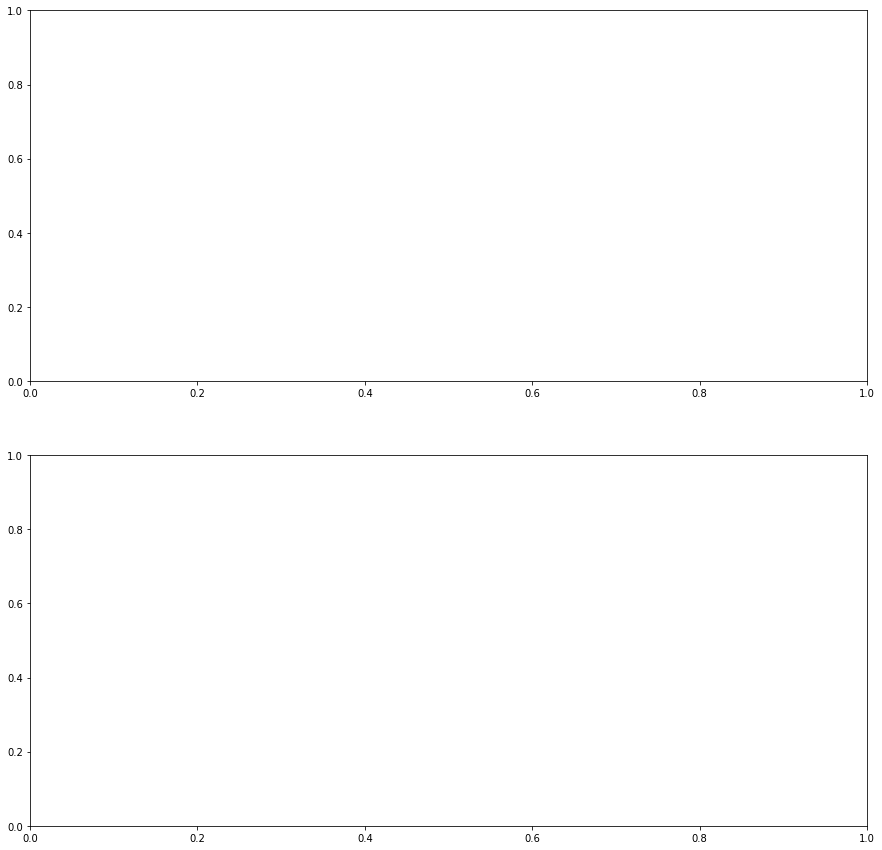

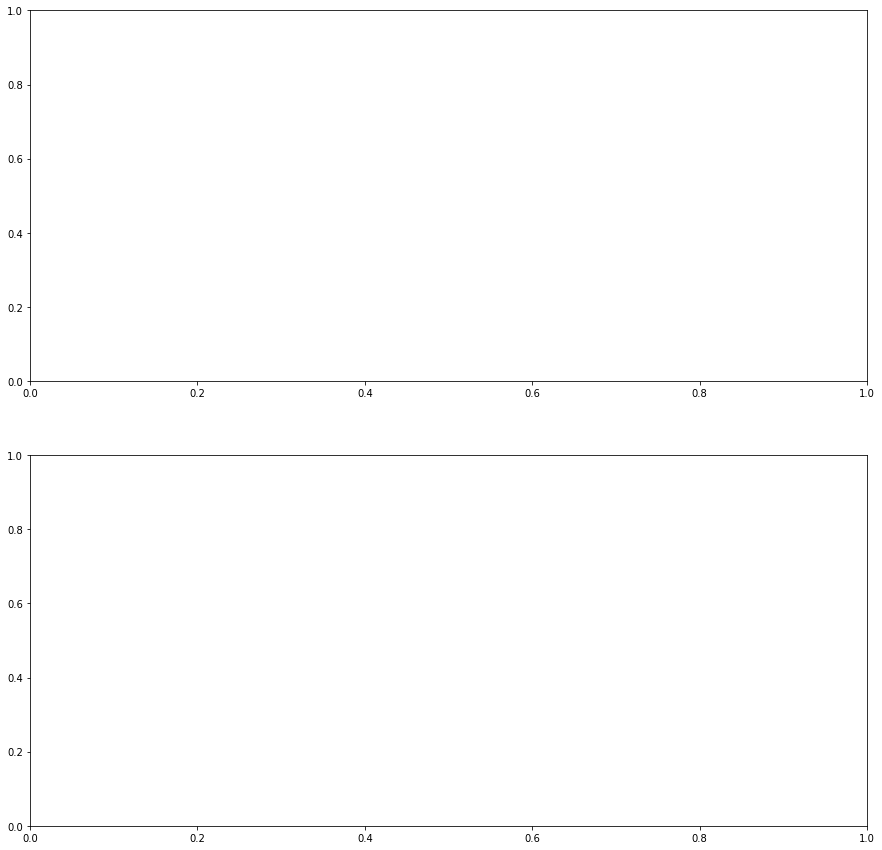

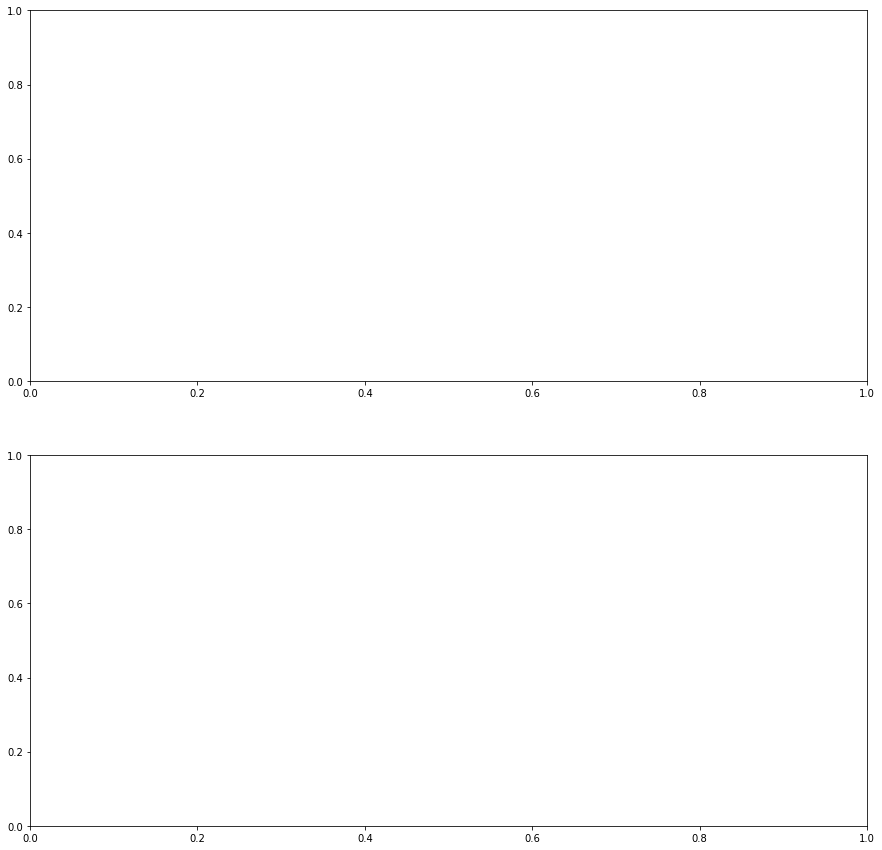

<Figure size 1080x1080 with 0 Axes>

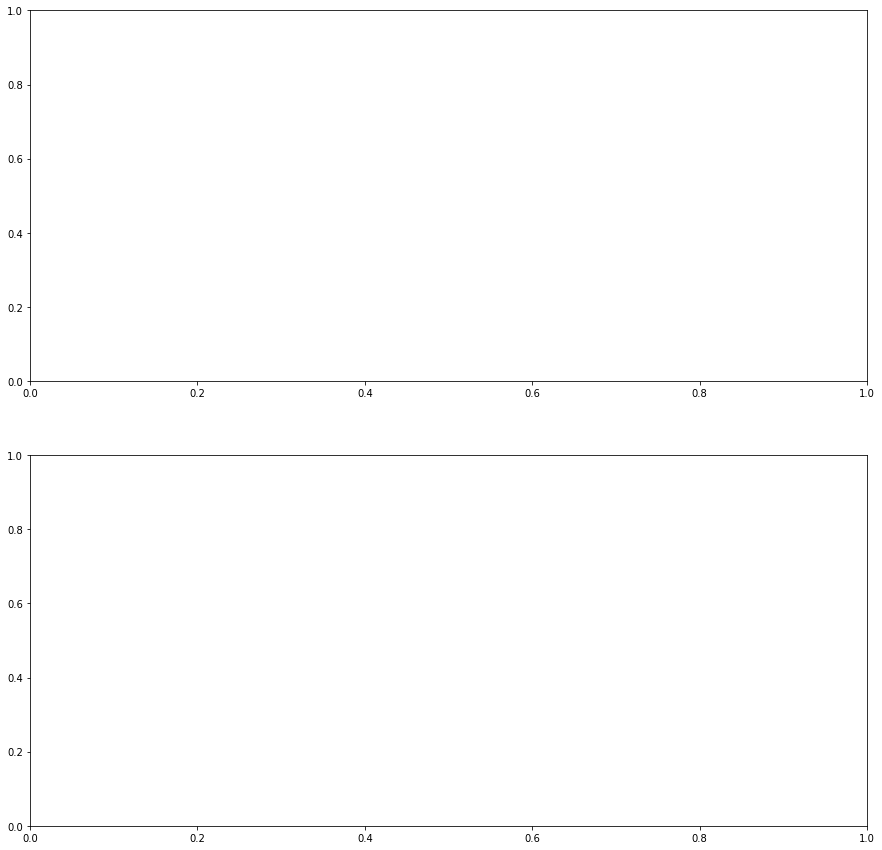

<Figure size 1080x1080 with 0 Axes>

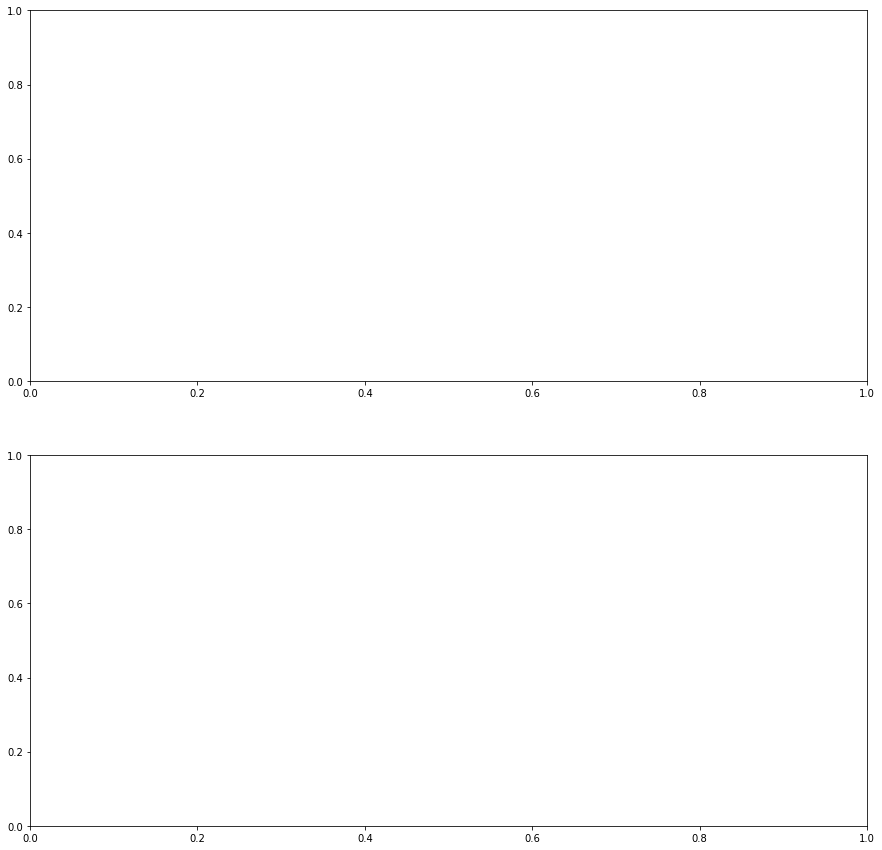

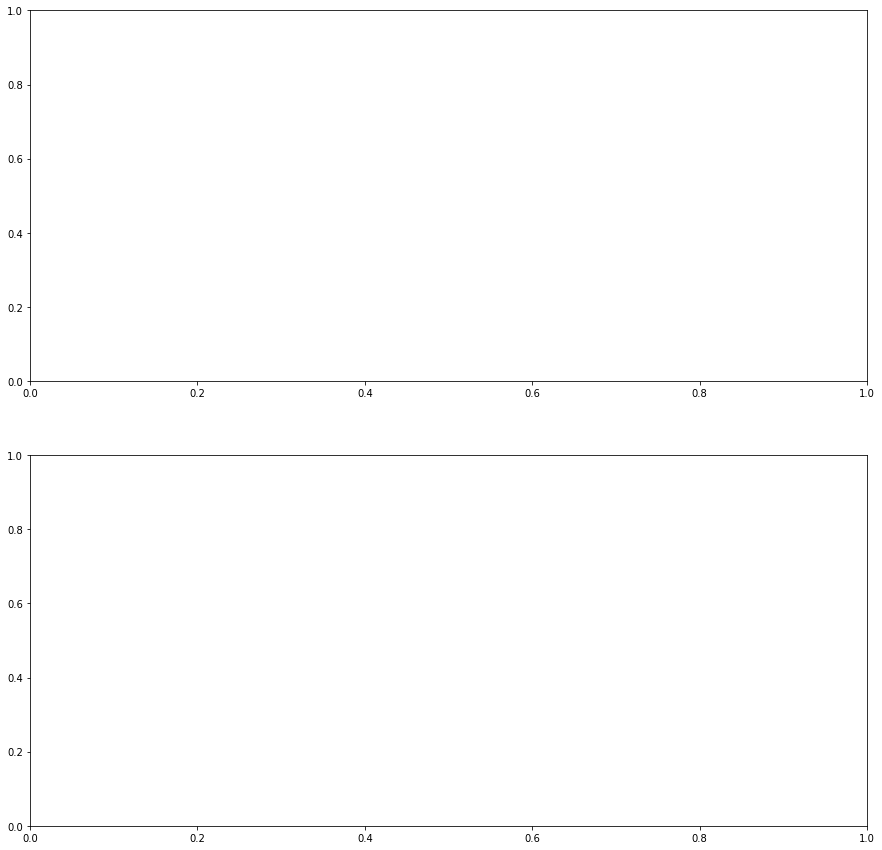

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

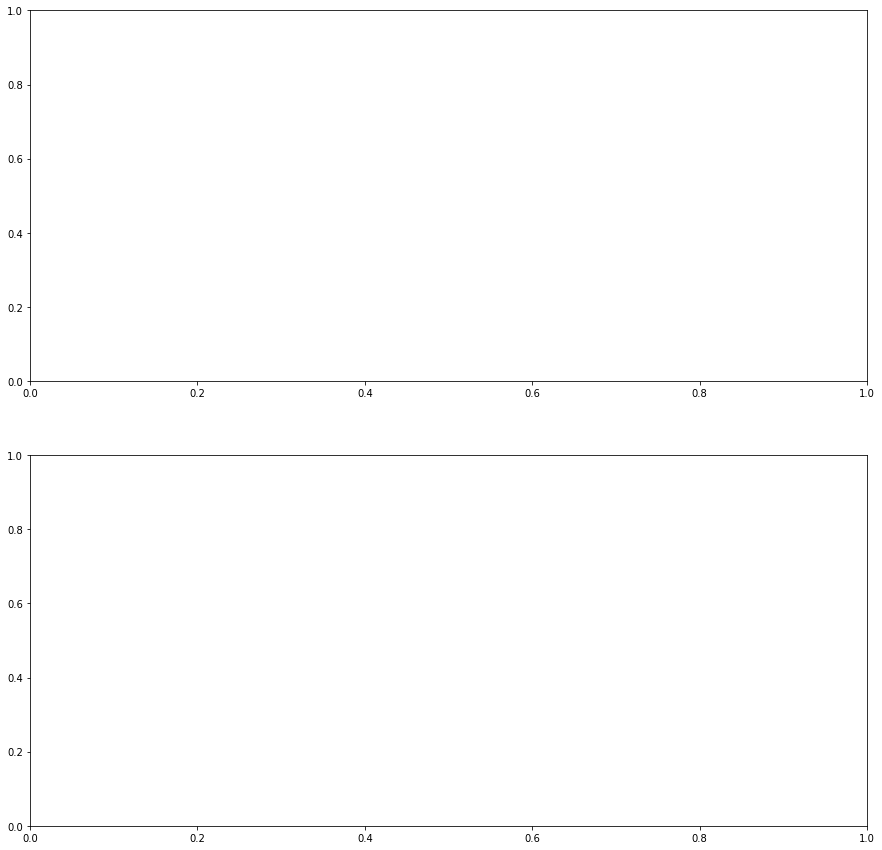

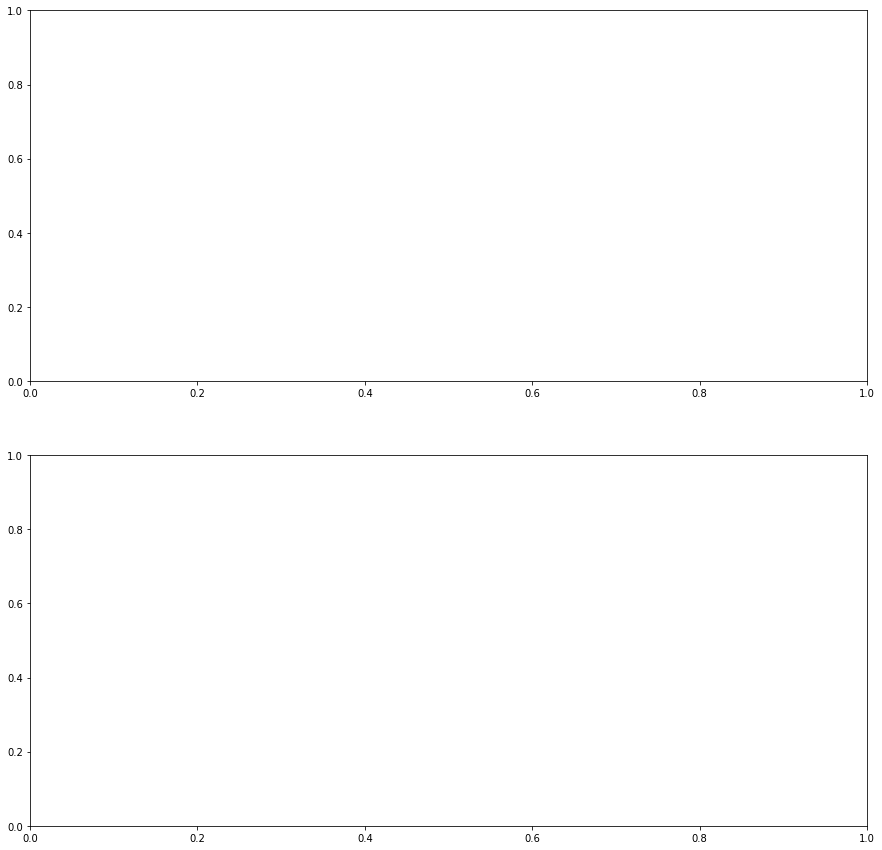

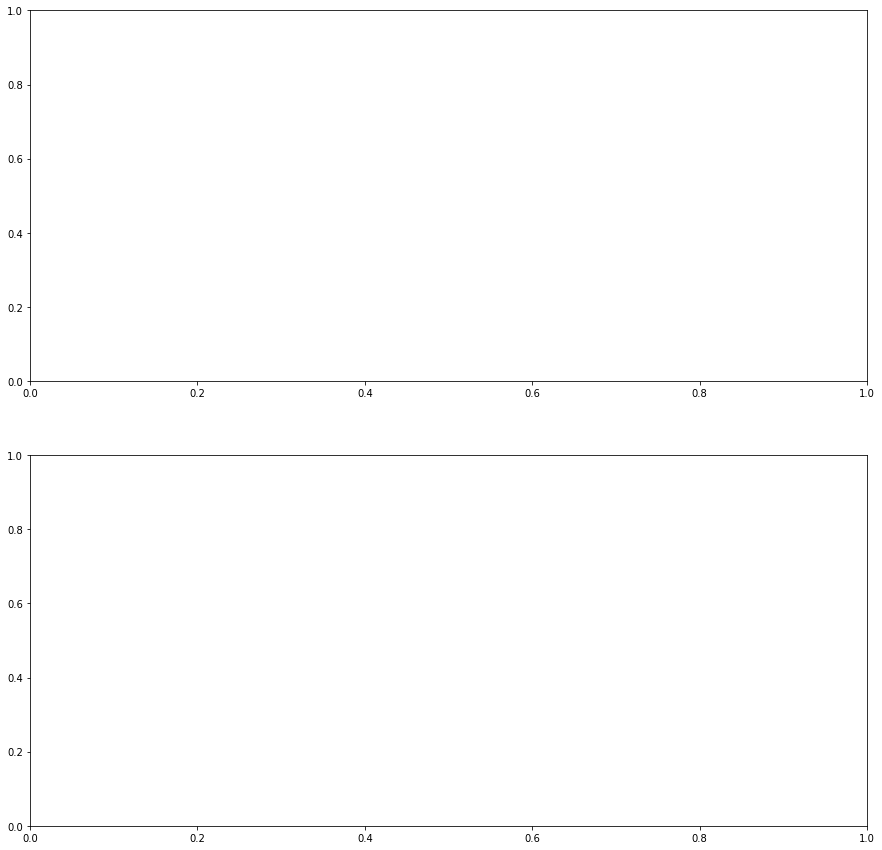

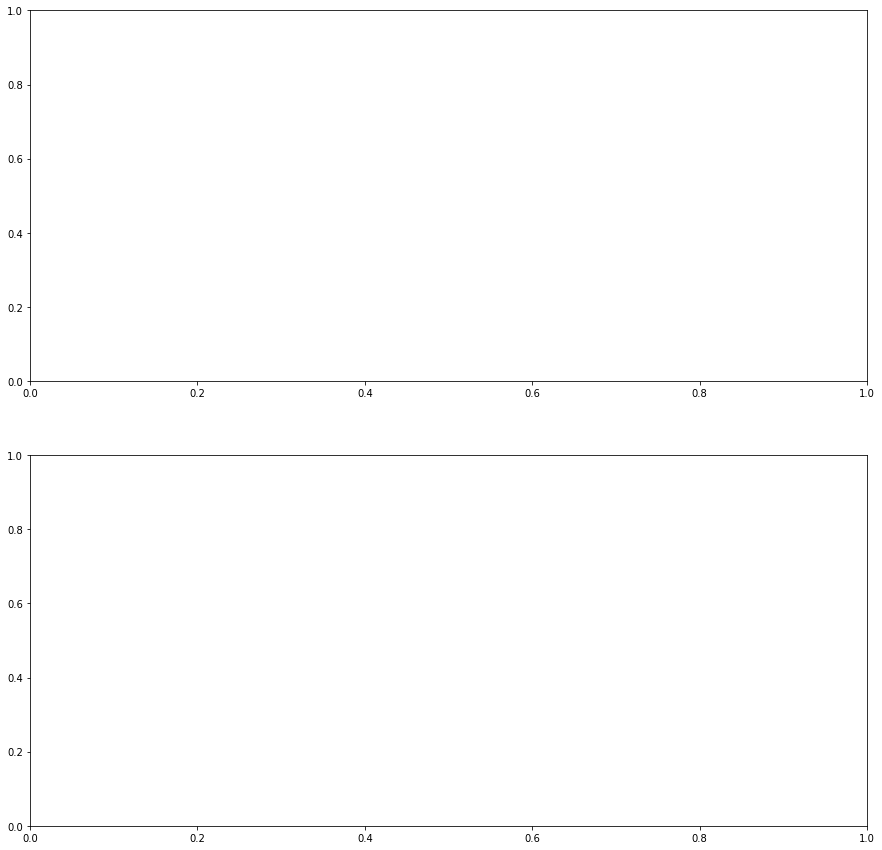

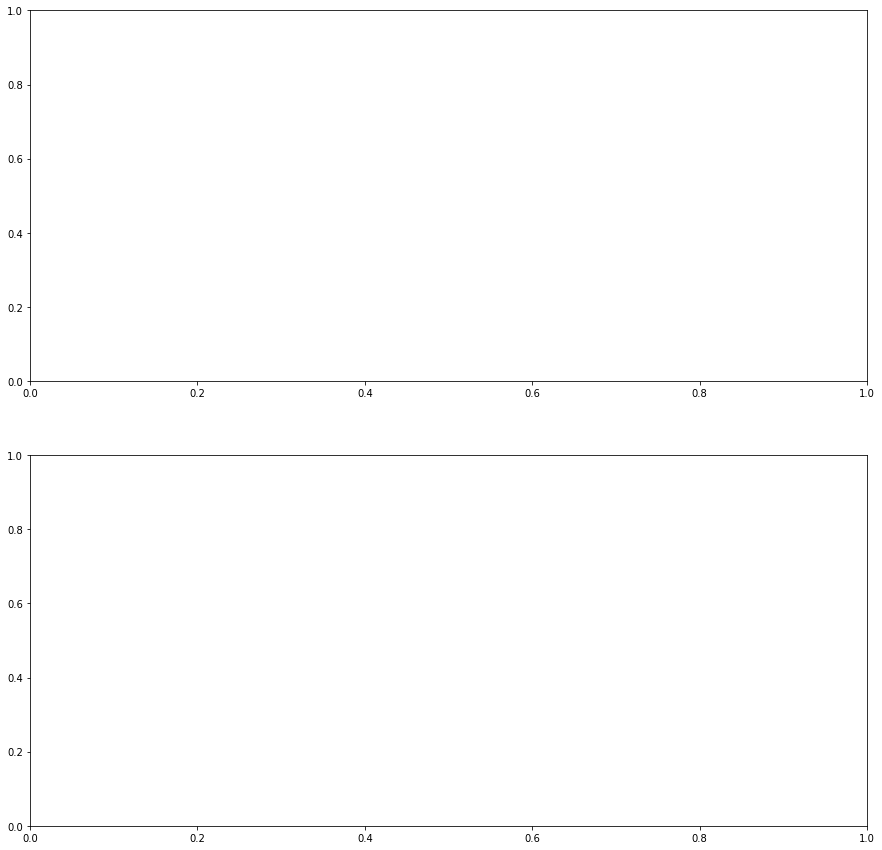

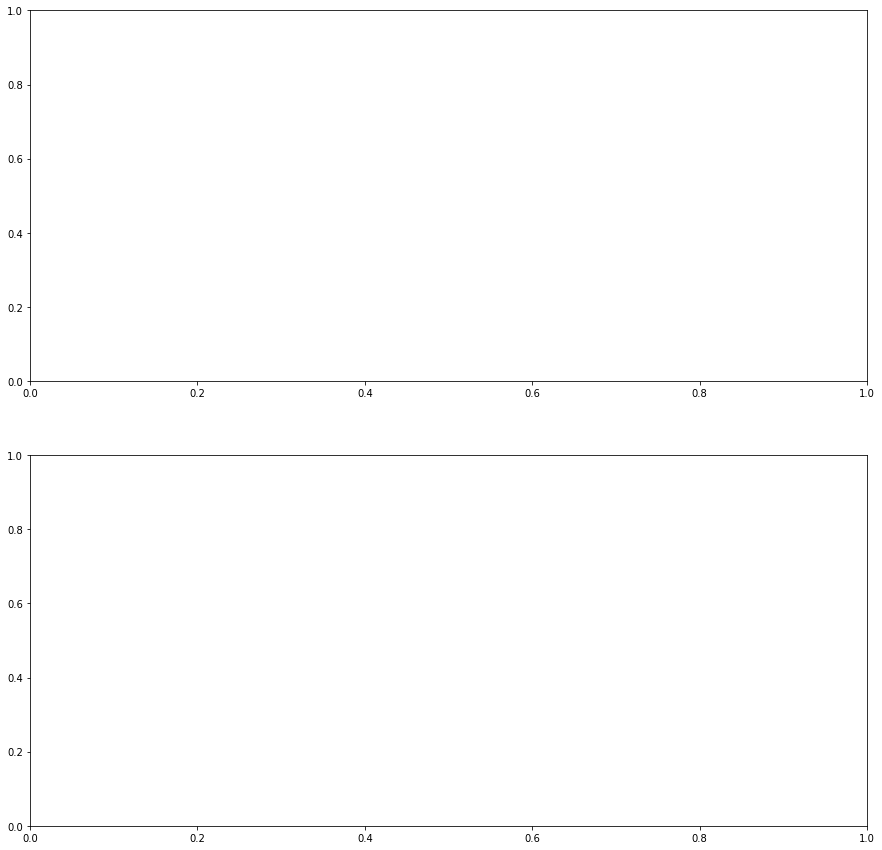

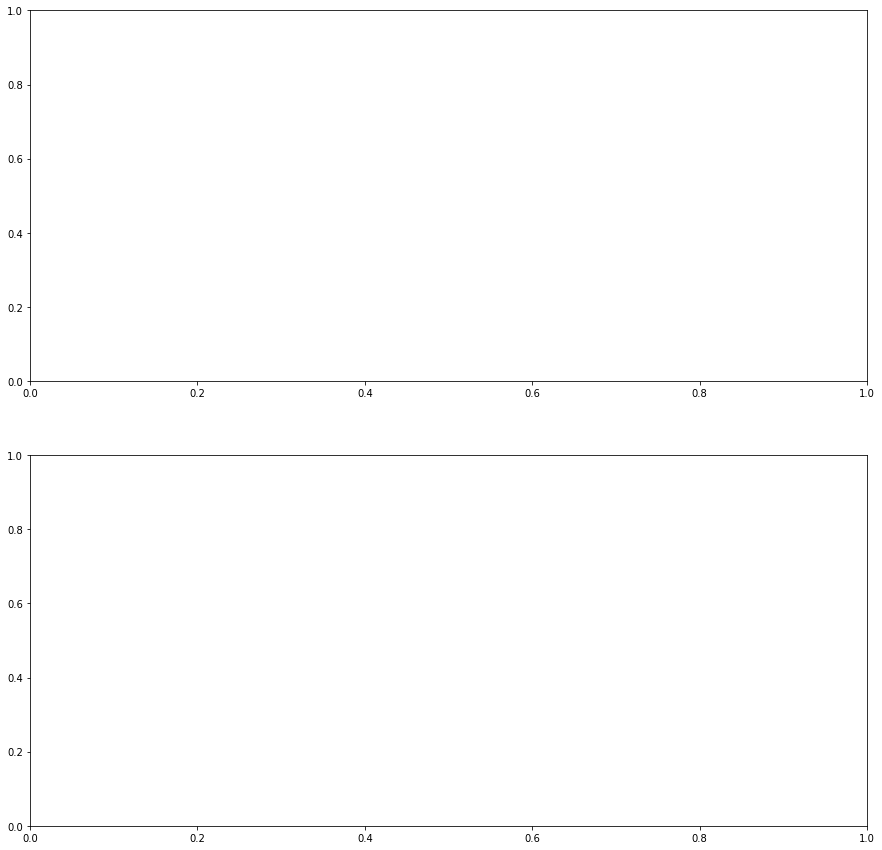

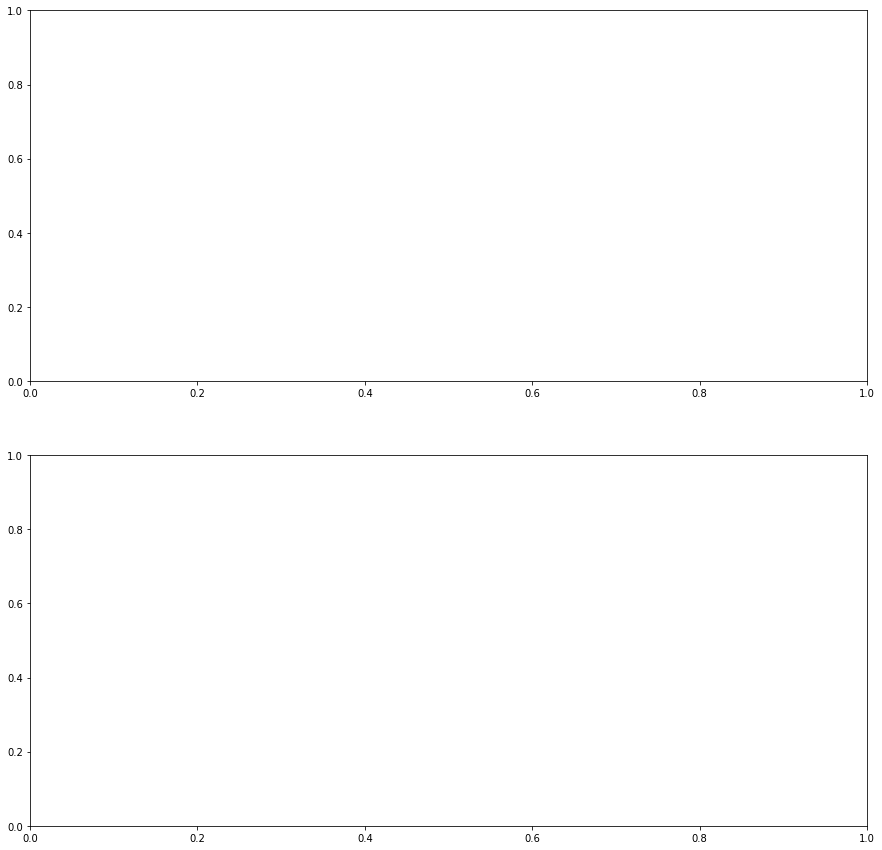

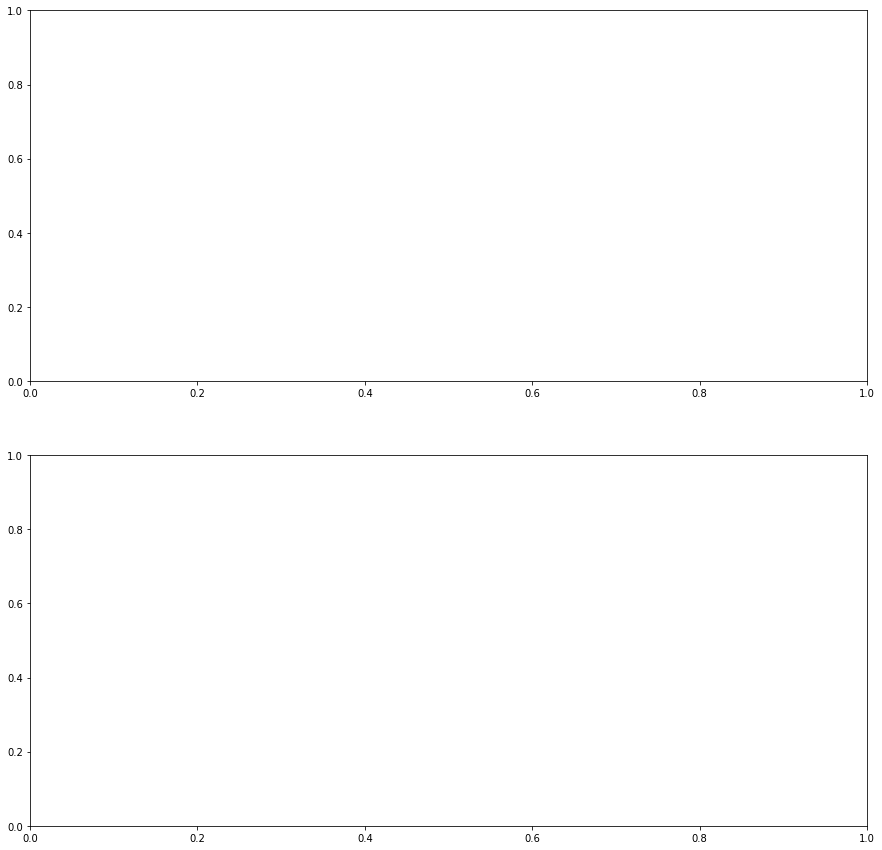

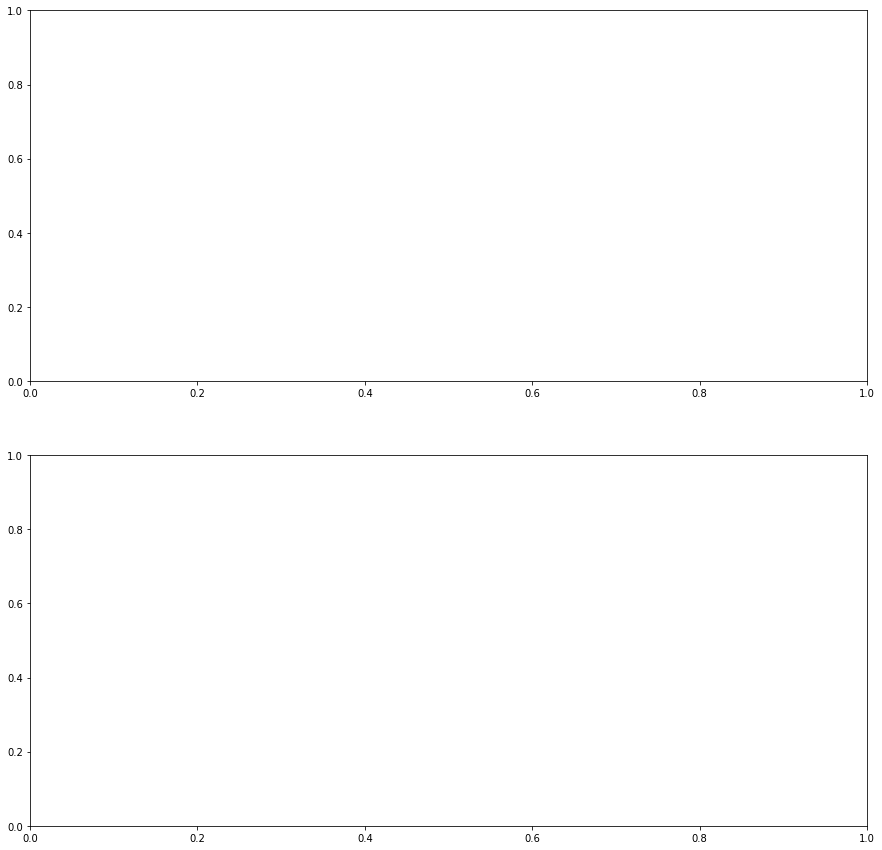

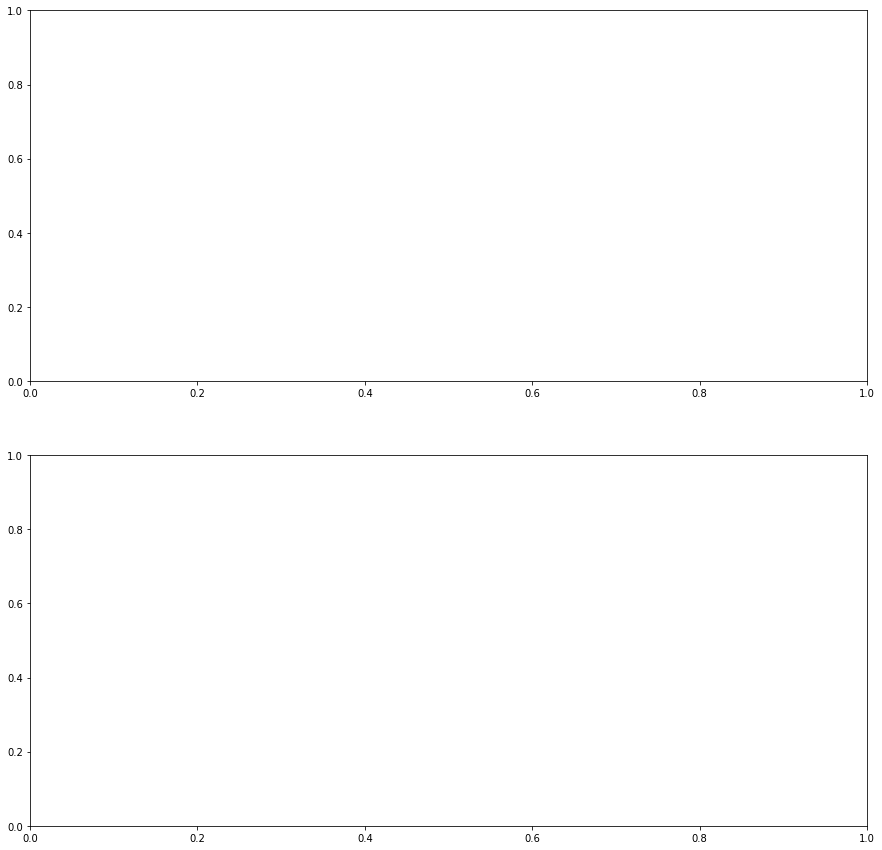

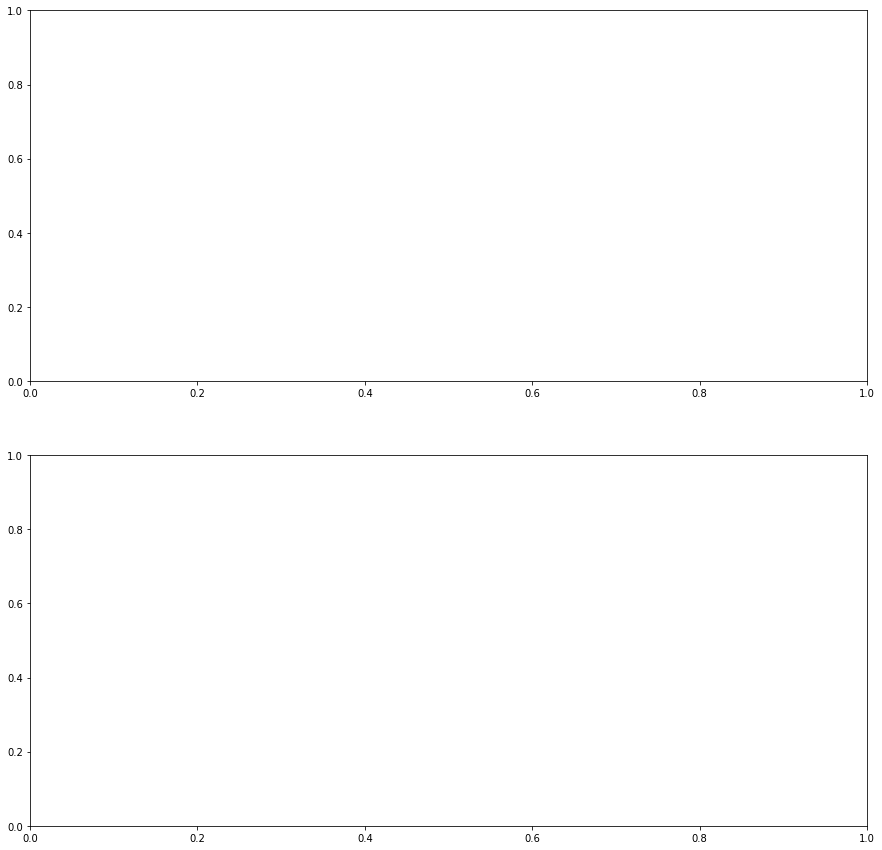

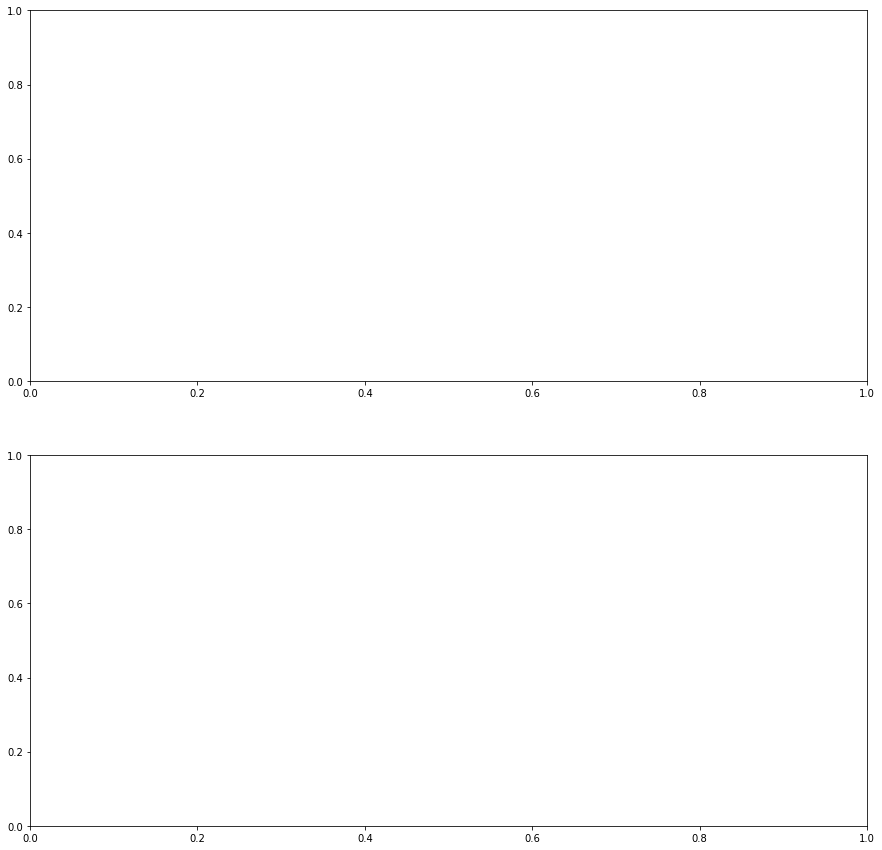

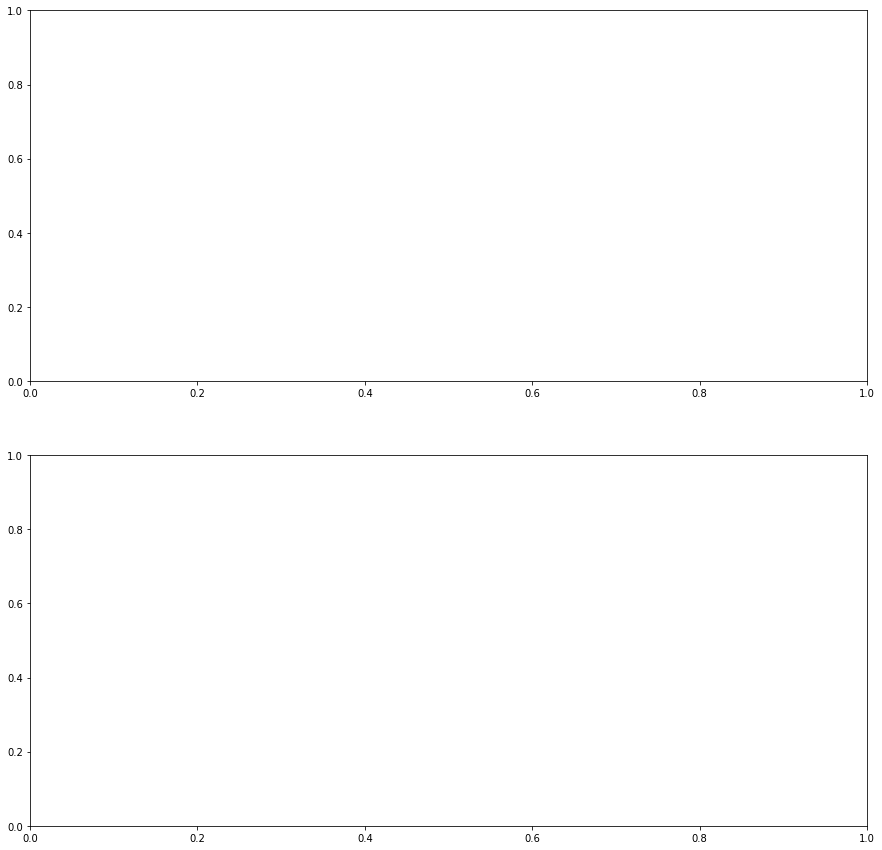

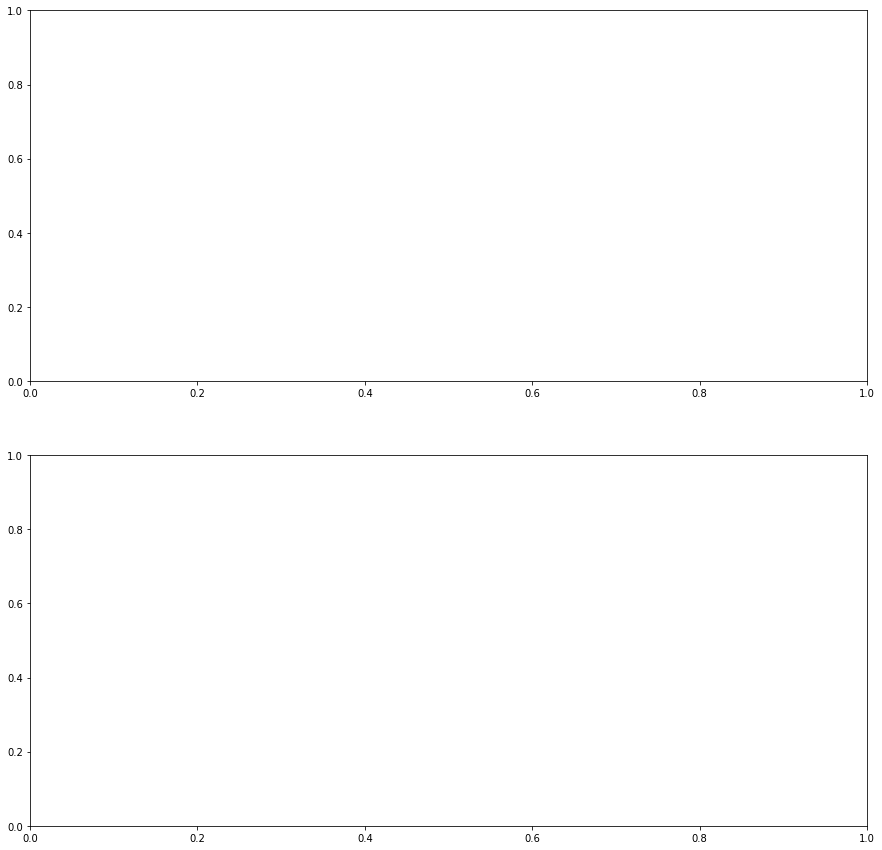

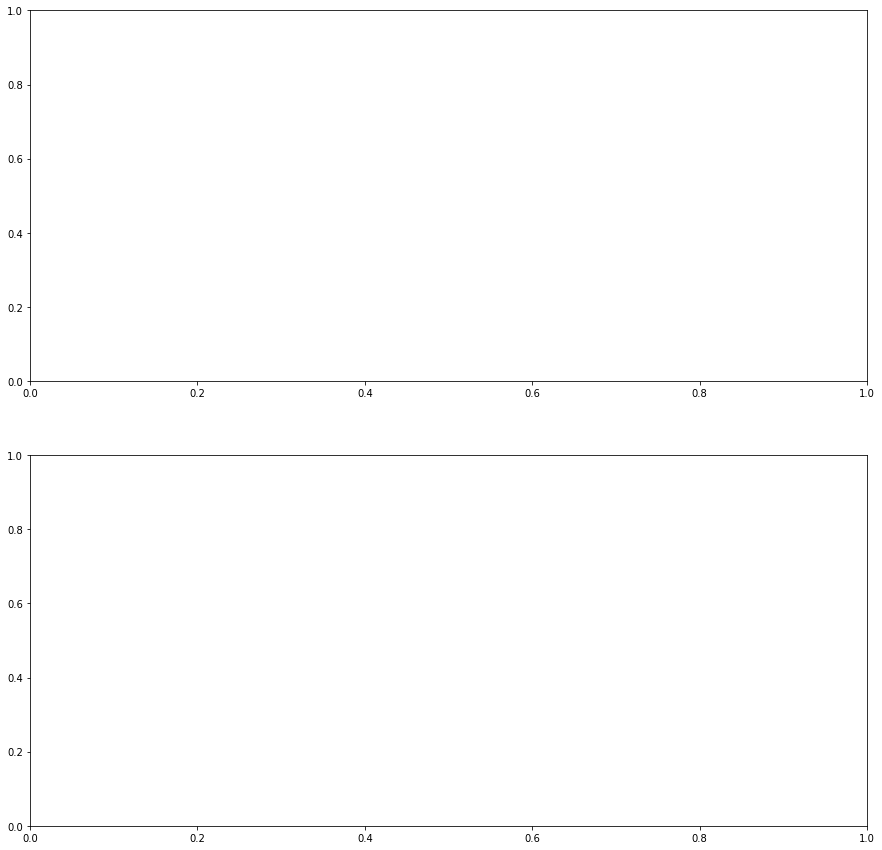

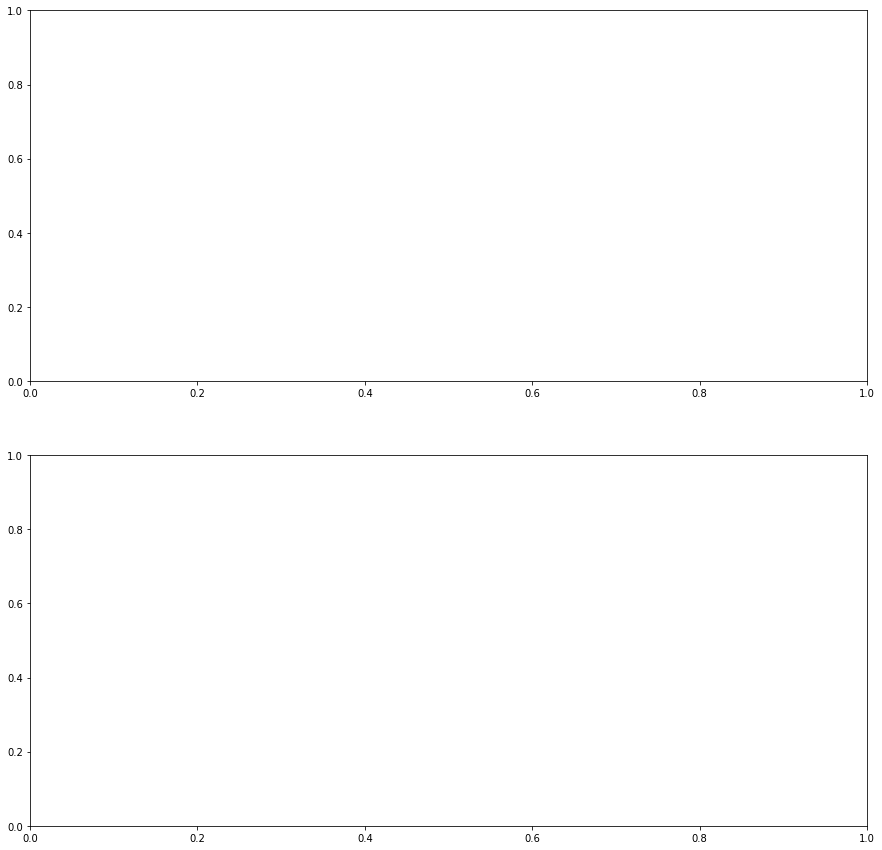

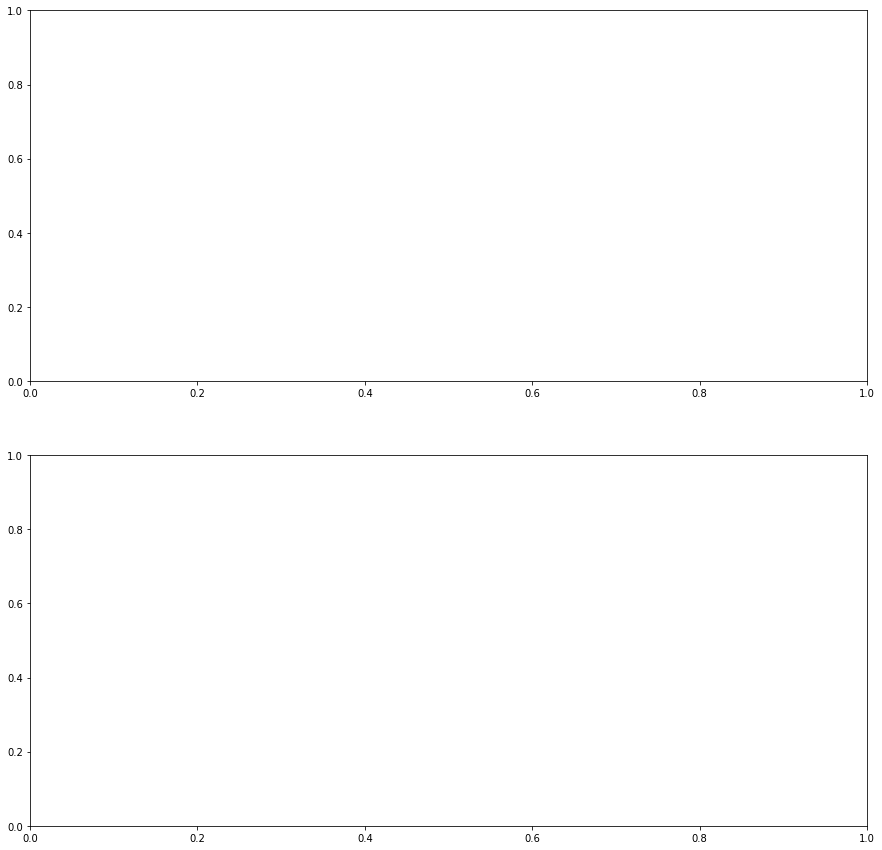

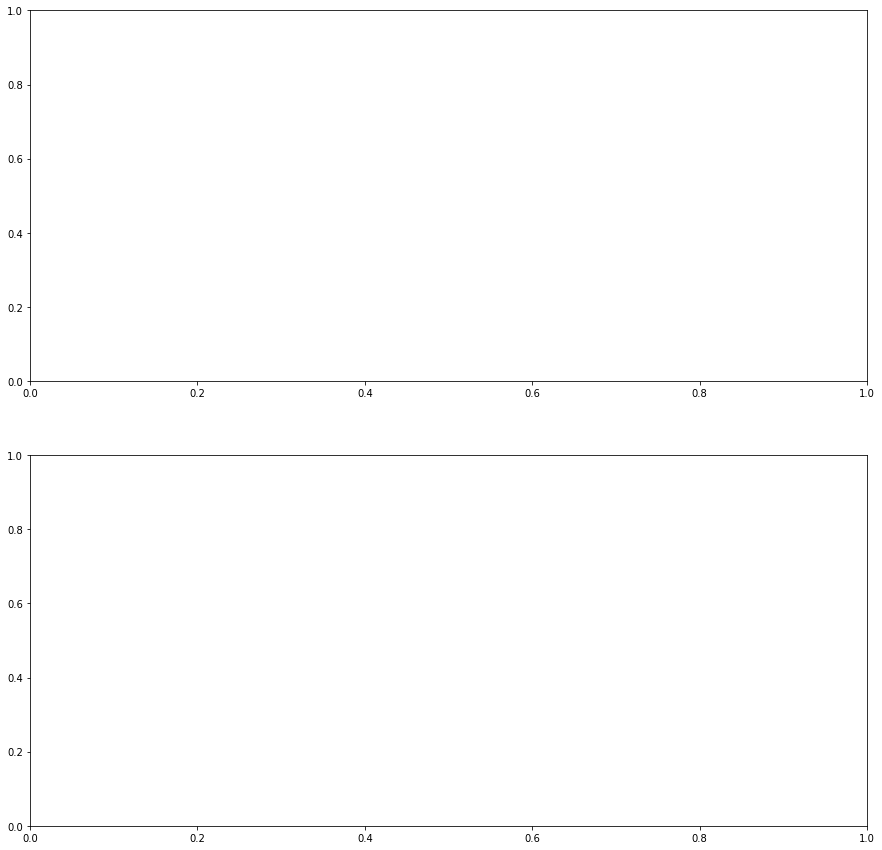

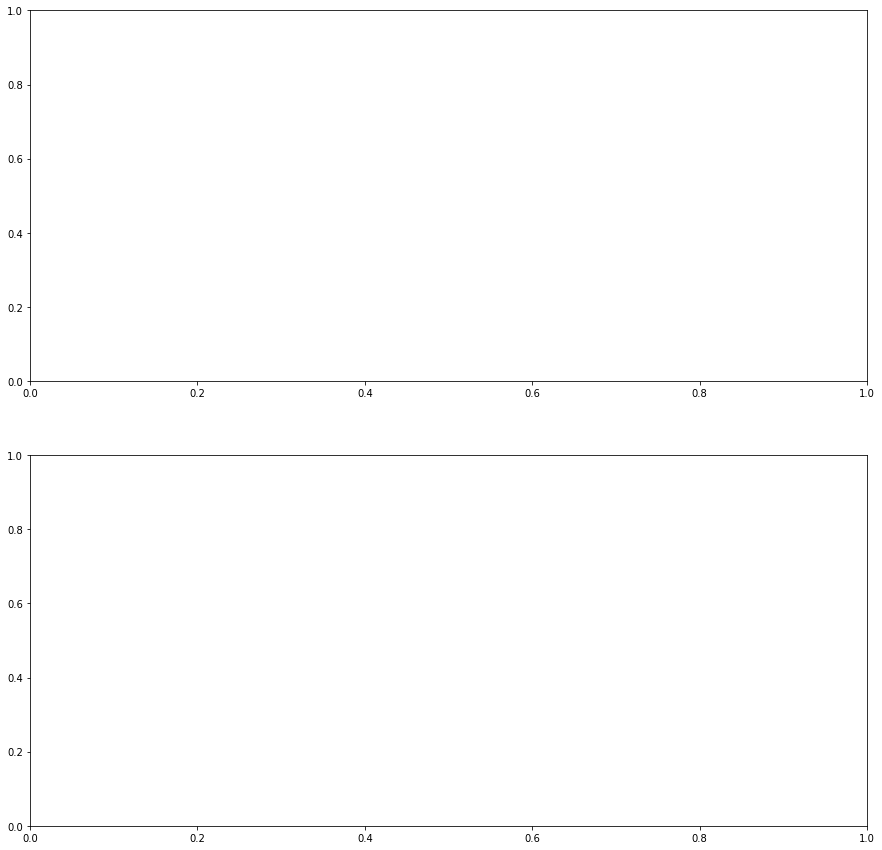

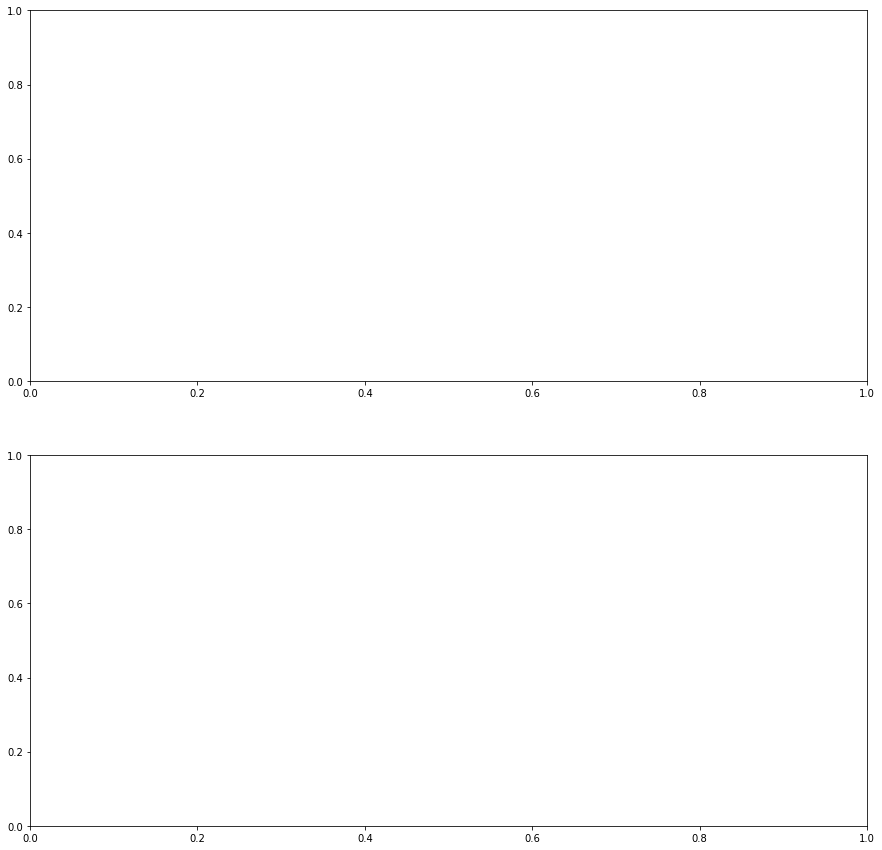

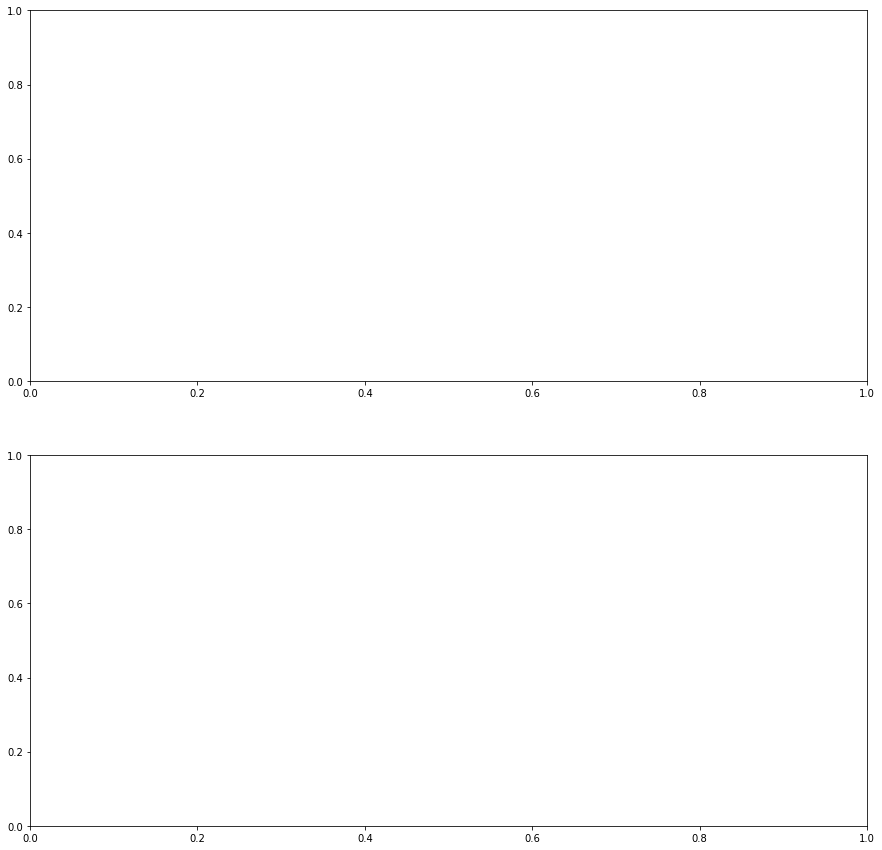

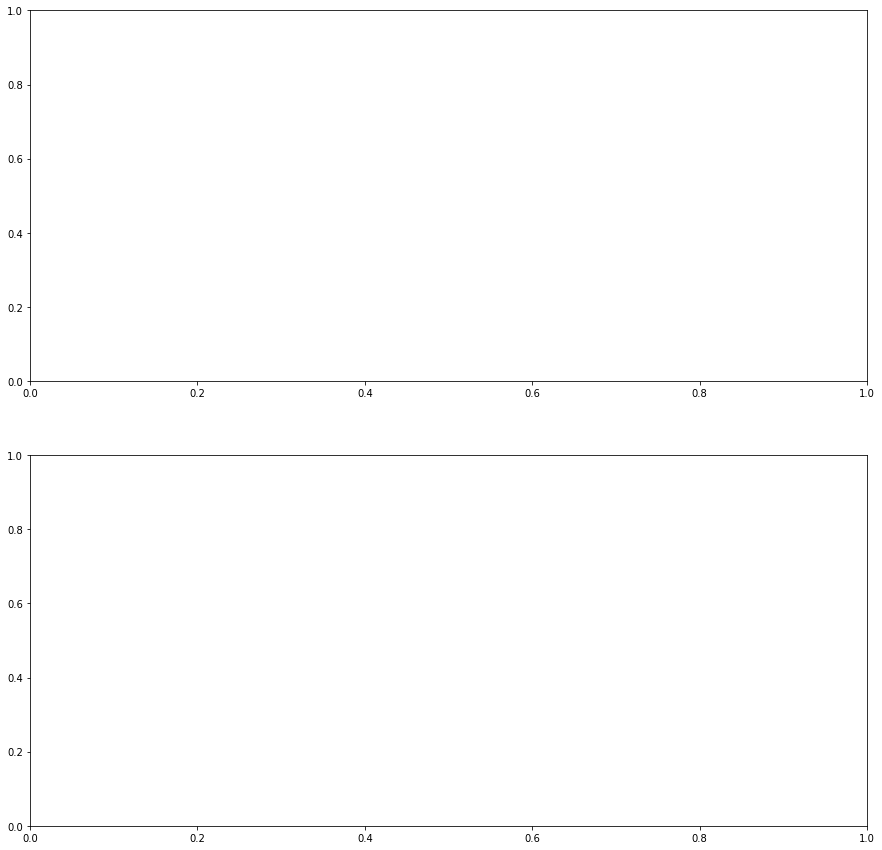

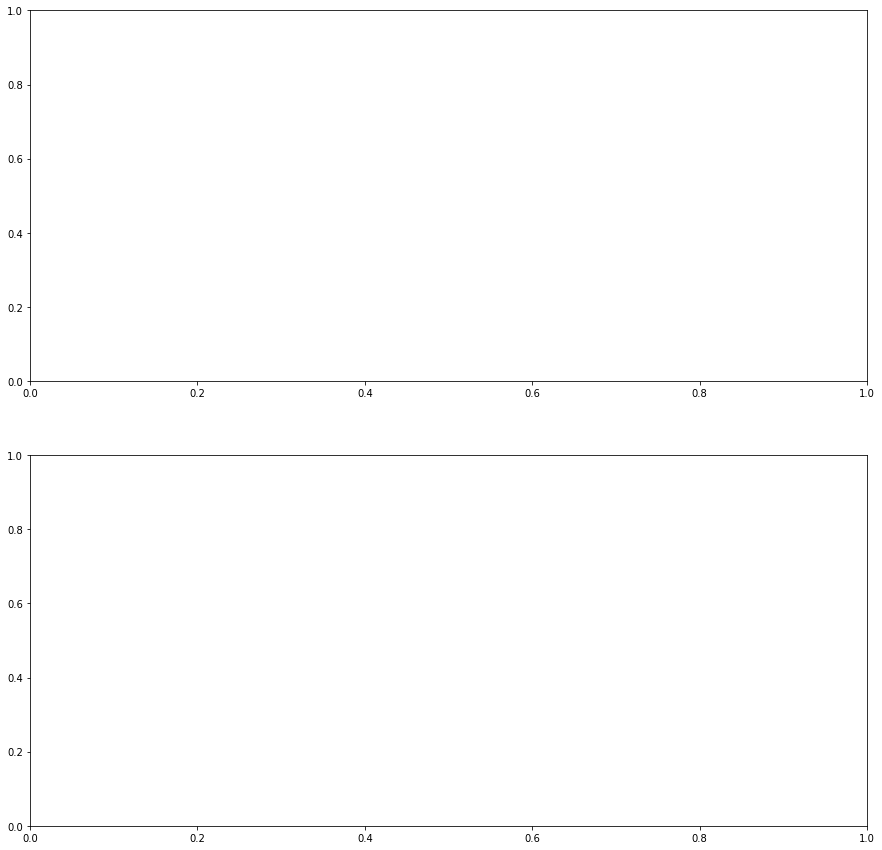

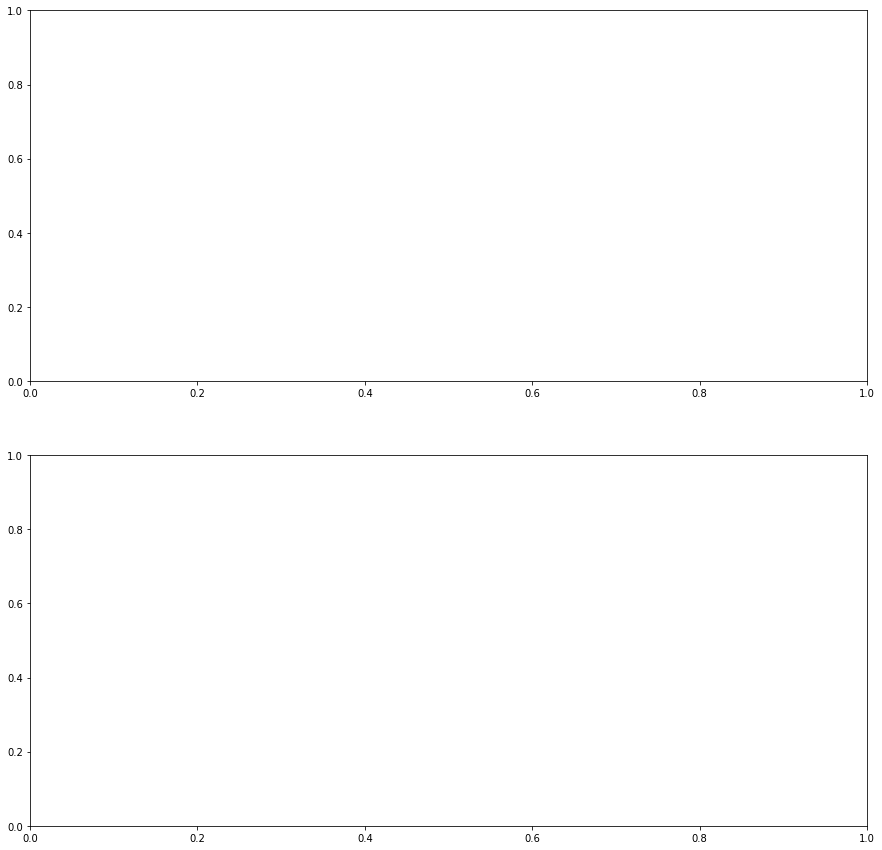

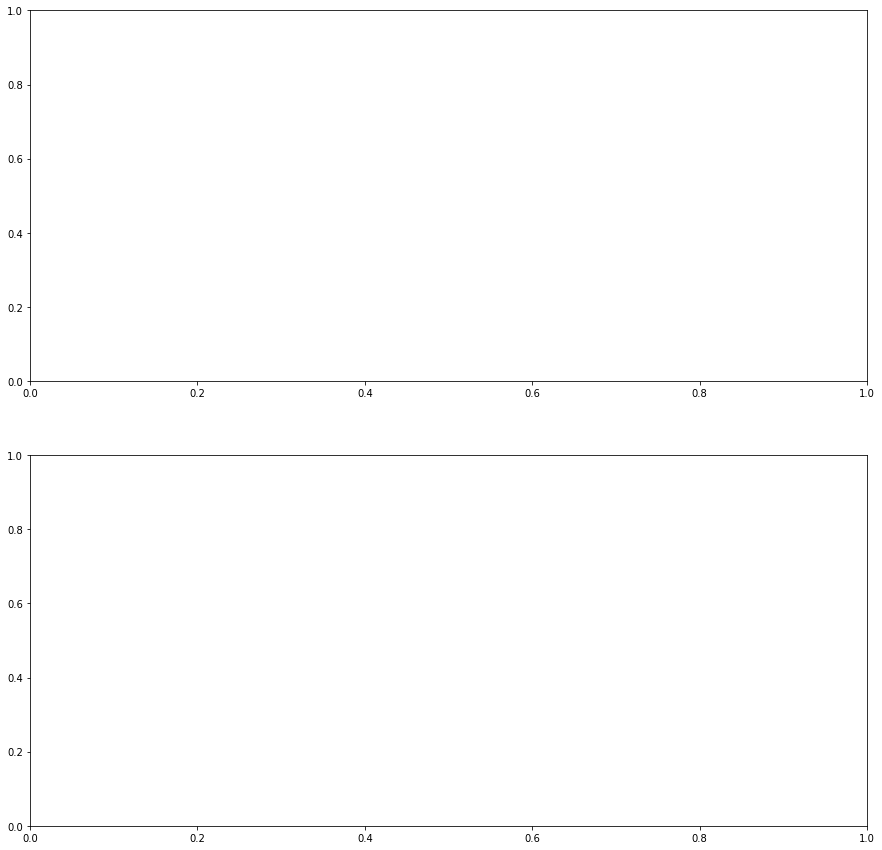

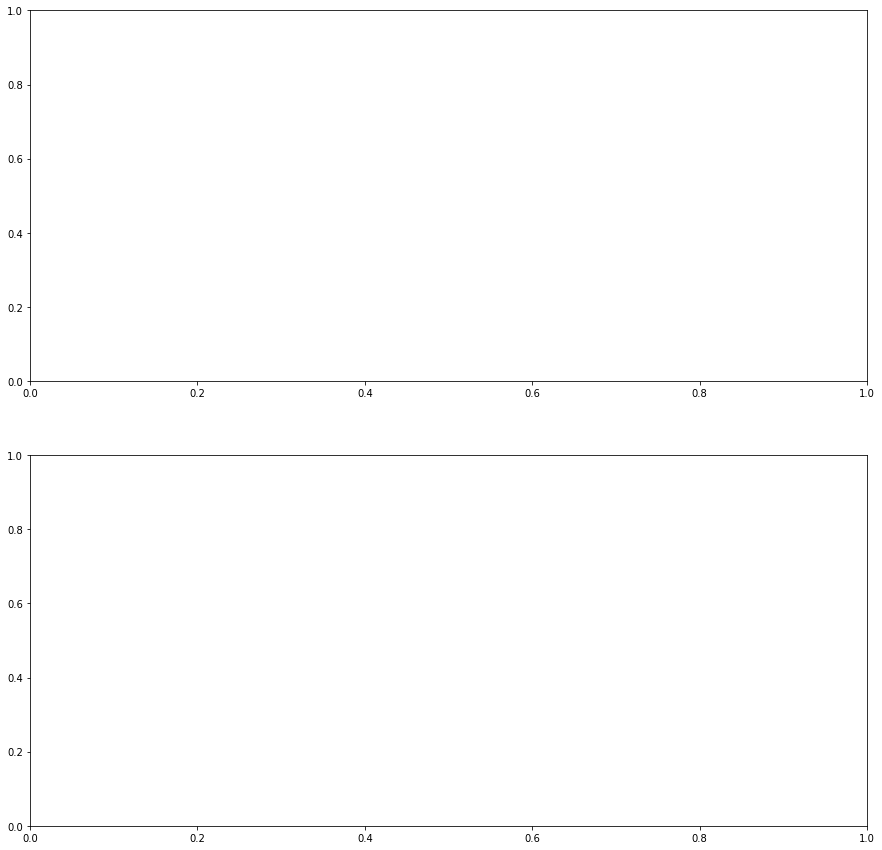

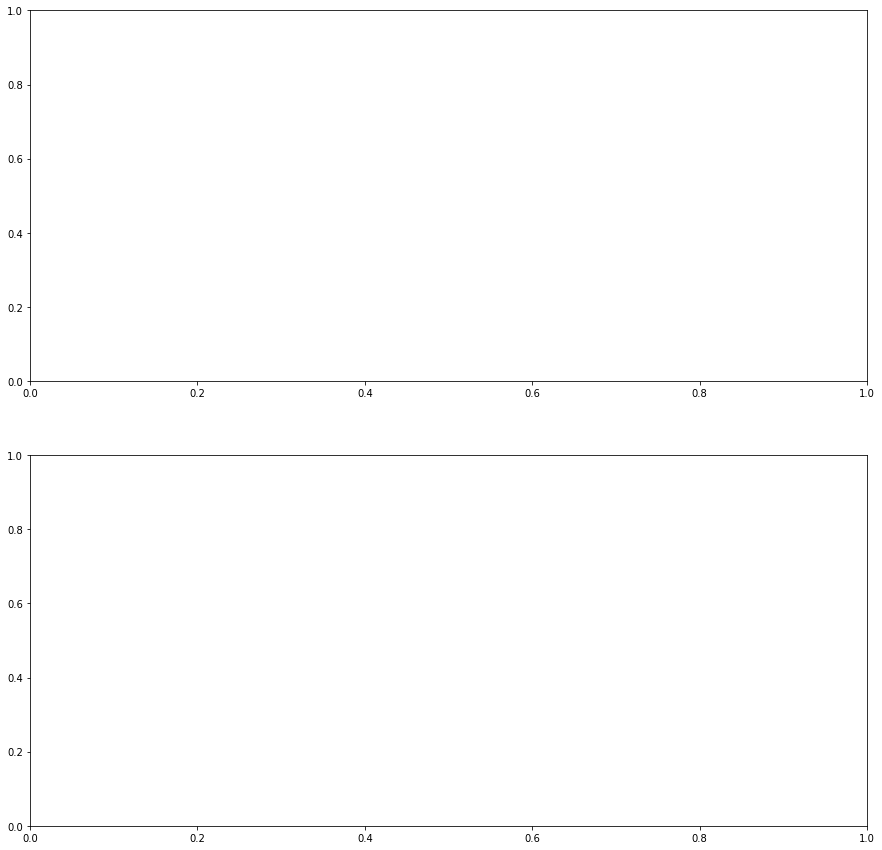

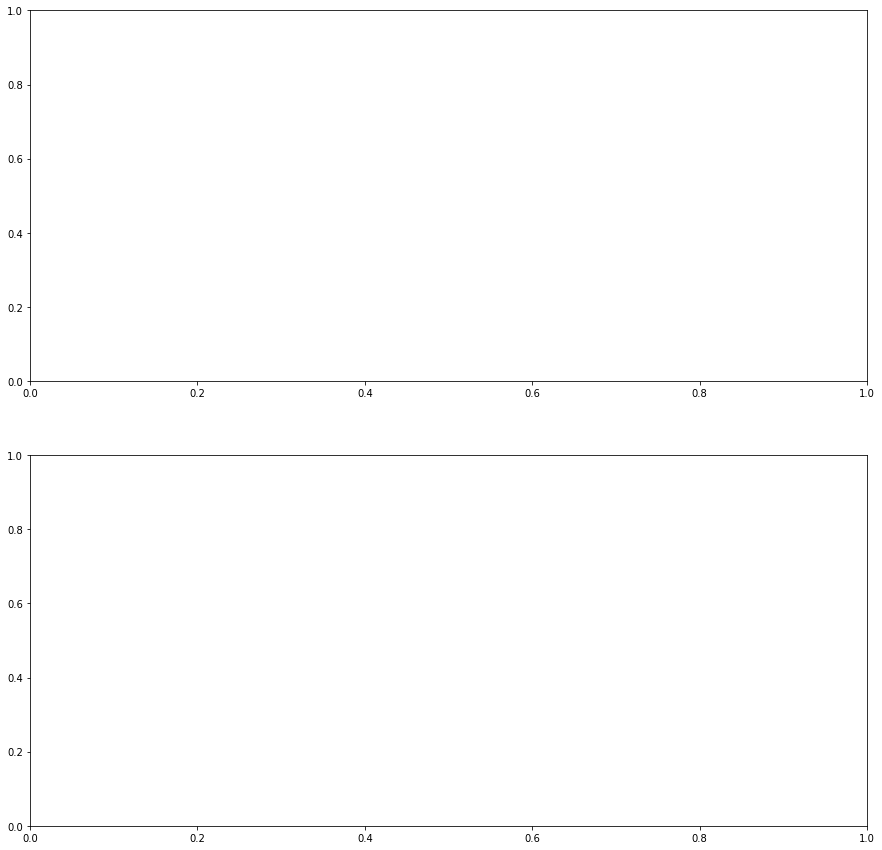

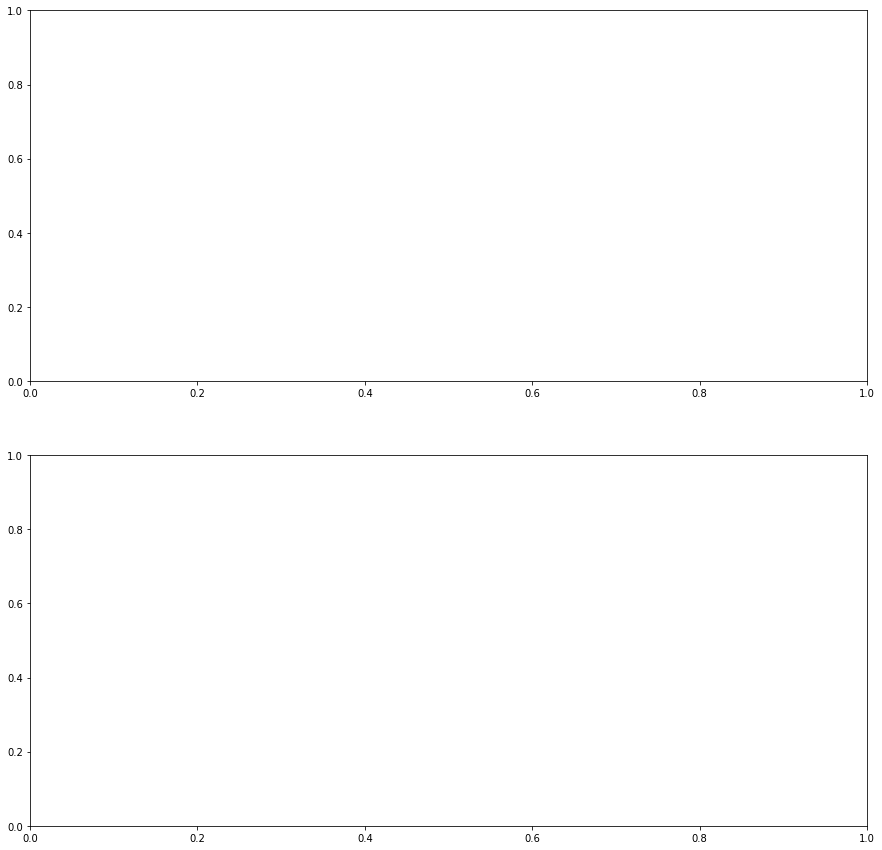

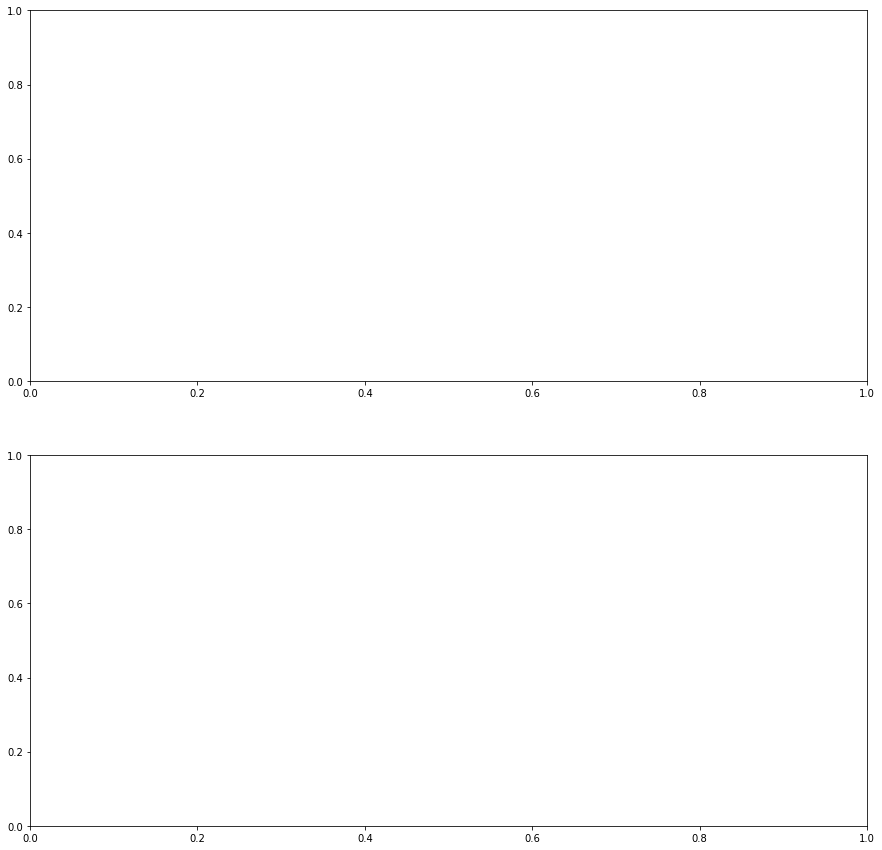

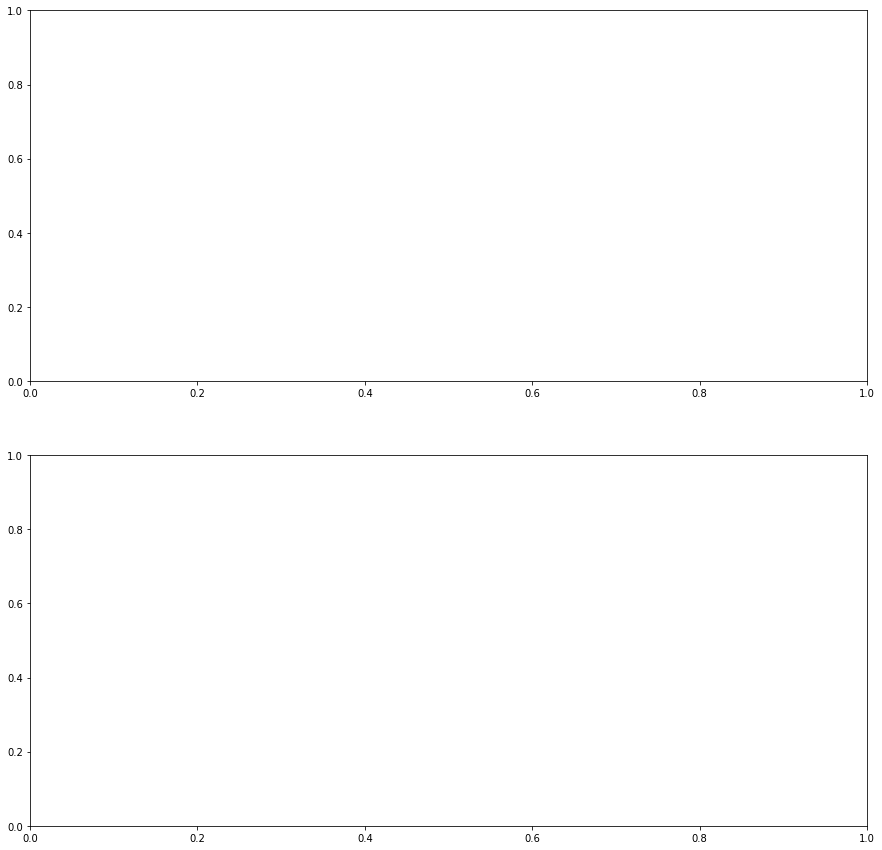

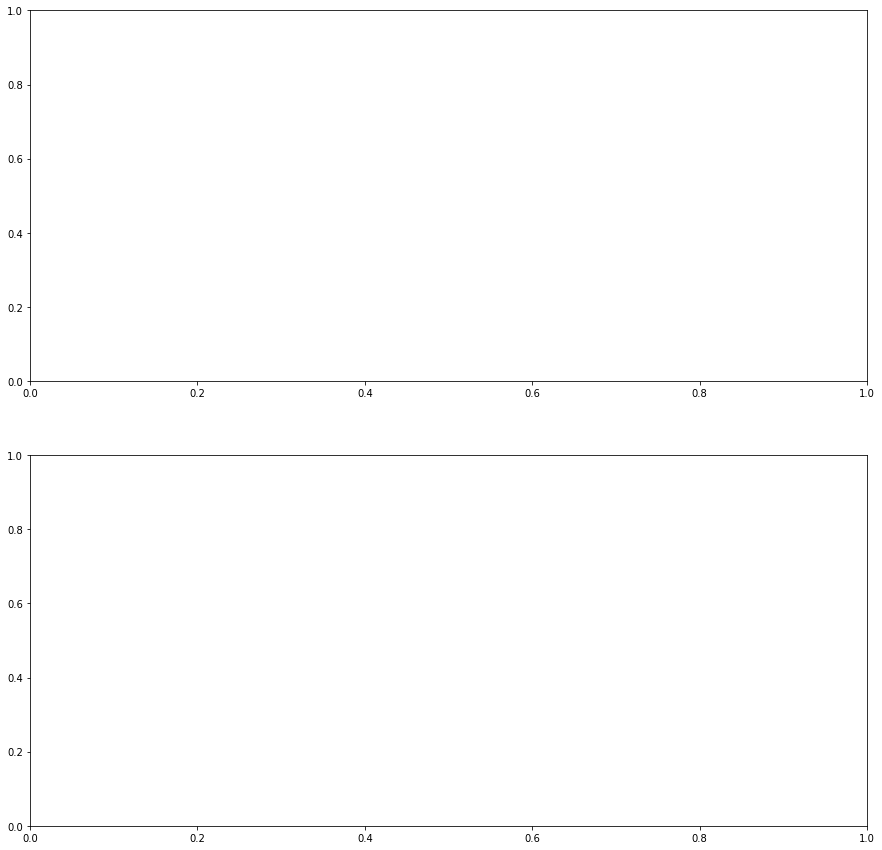

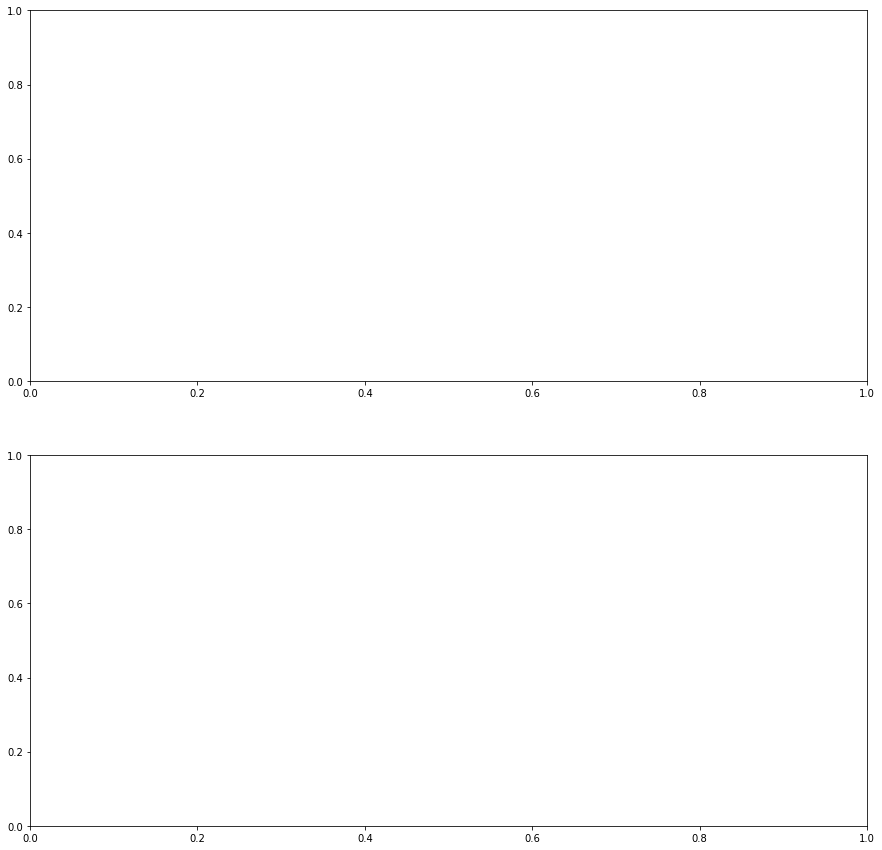

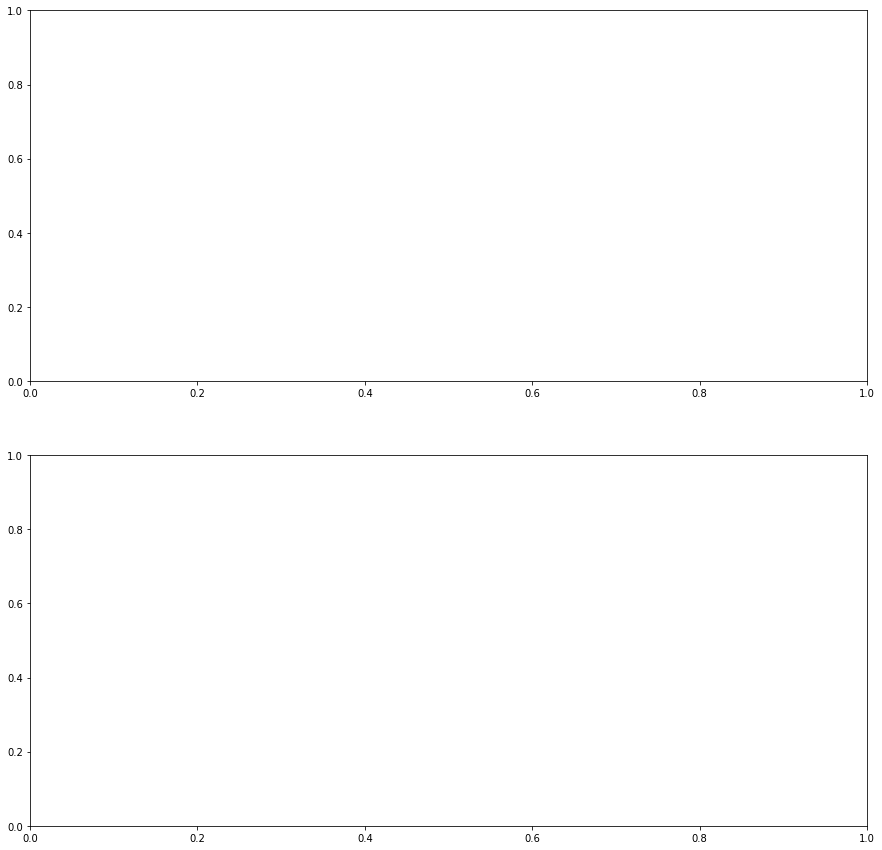

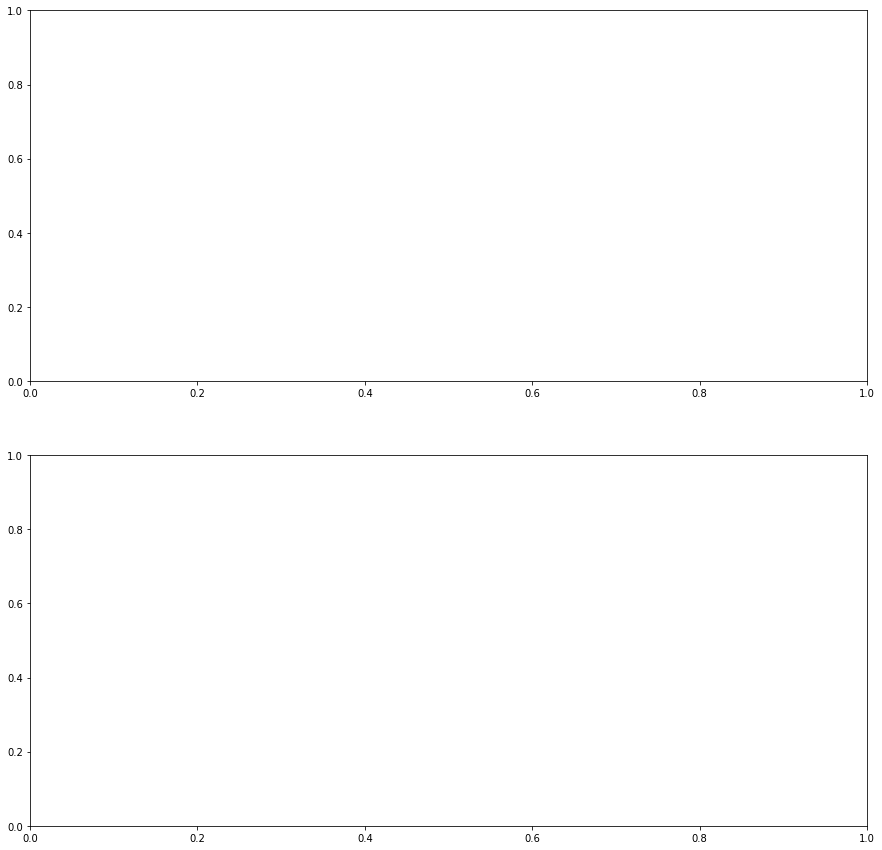

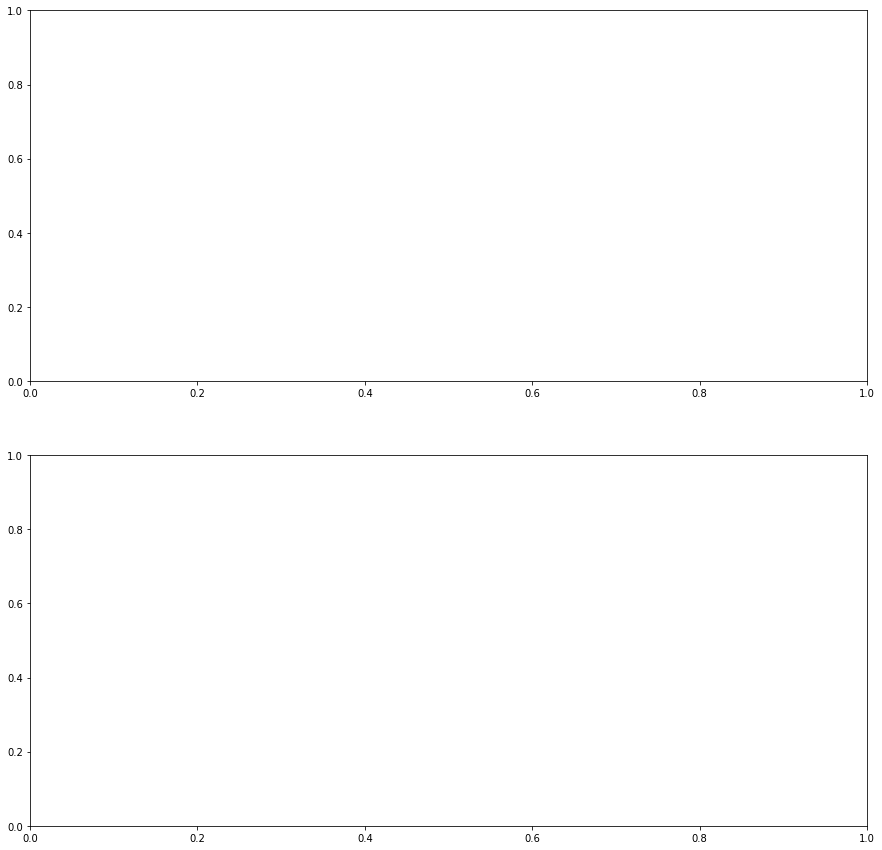

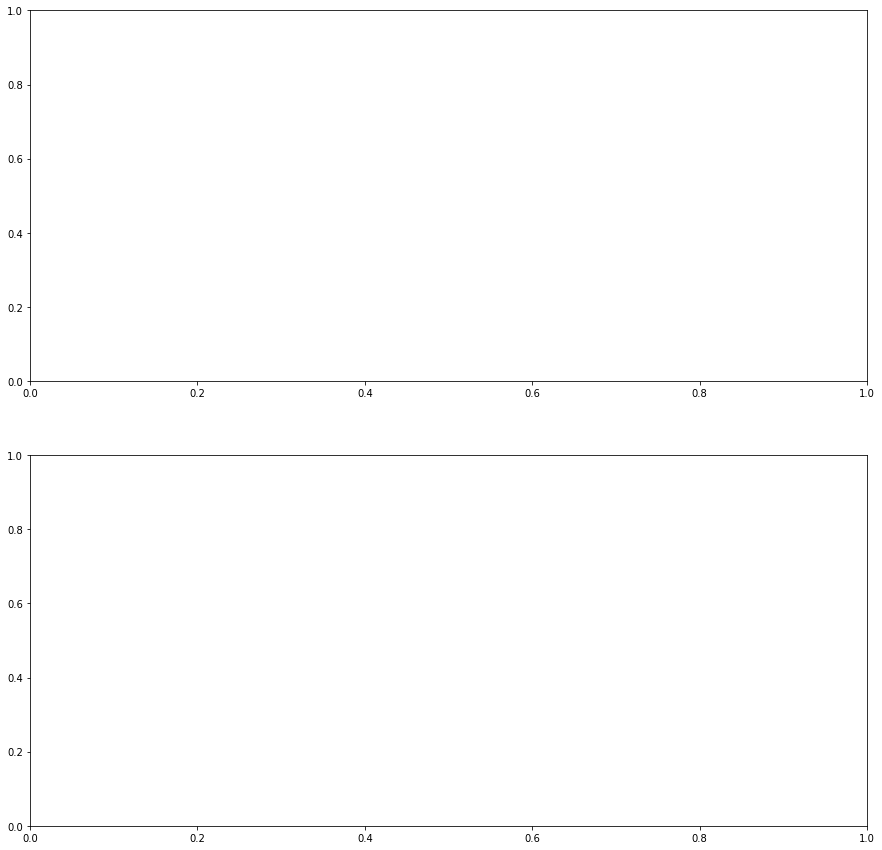

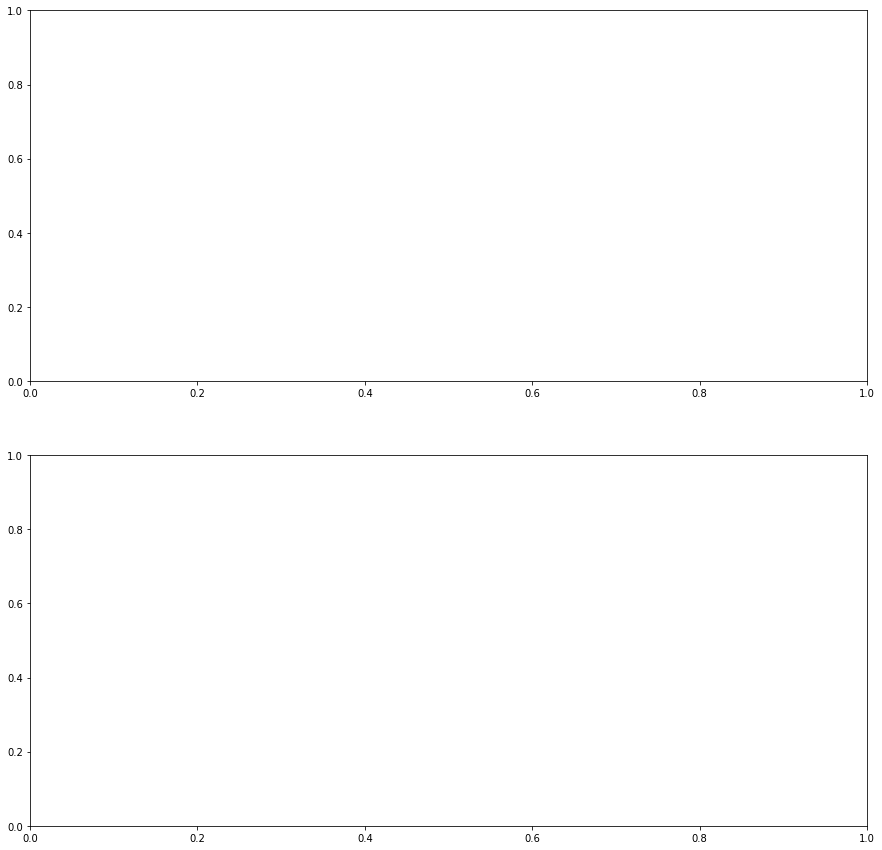

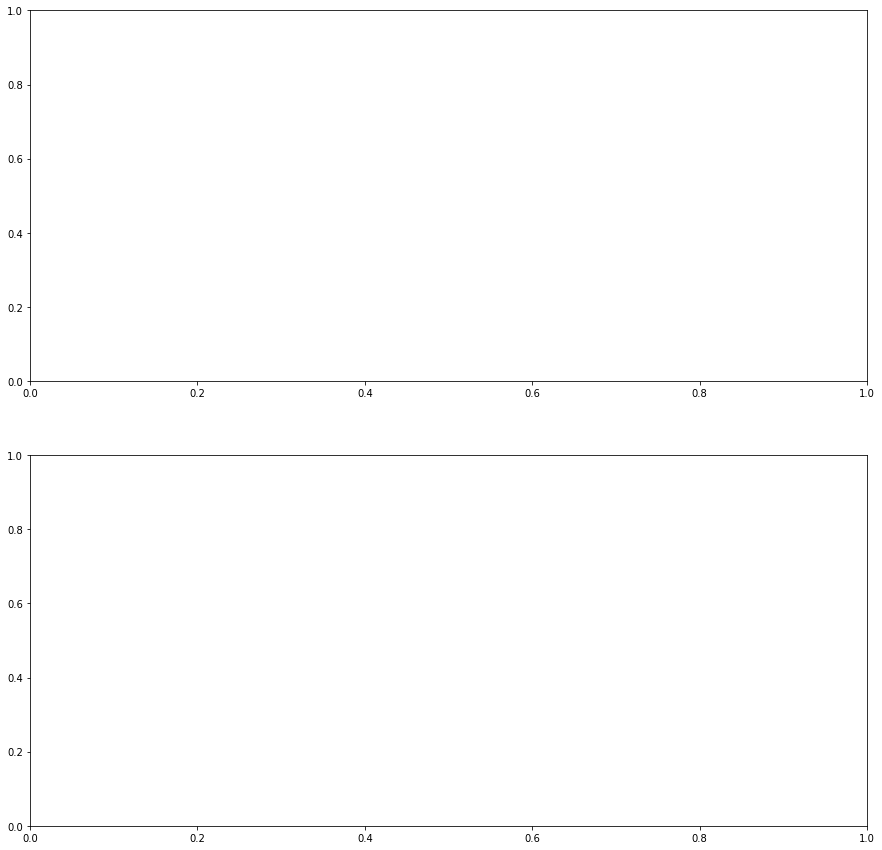

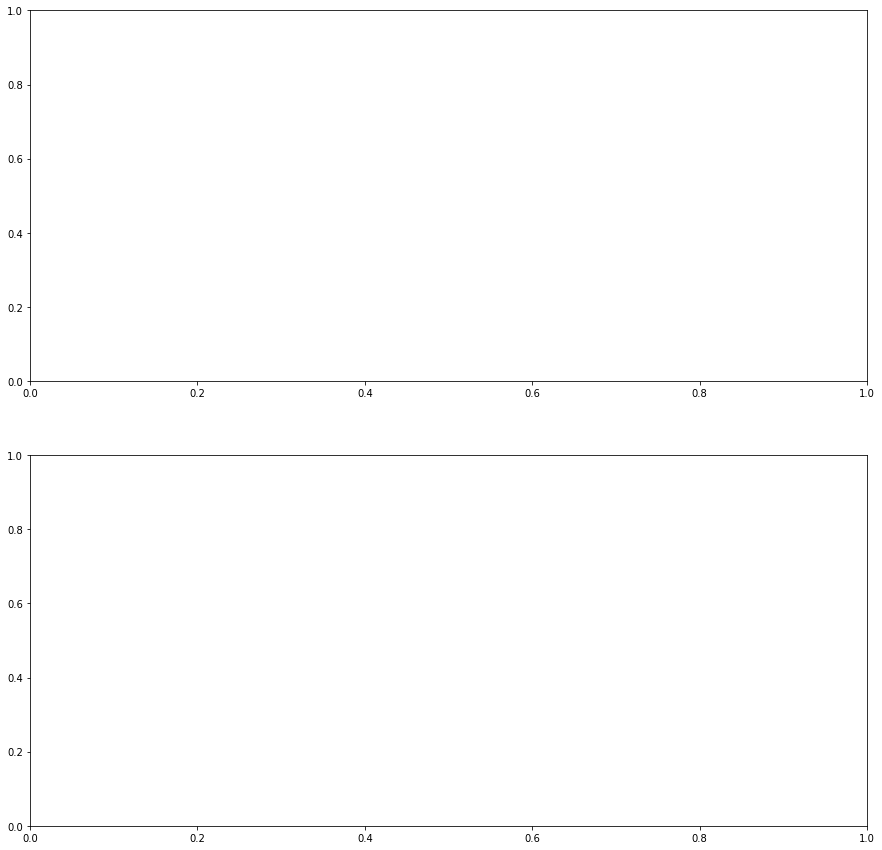

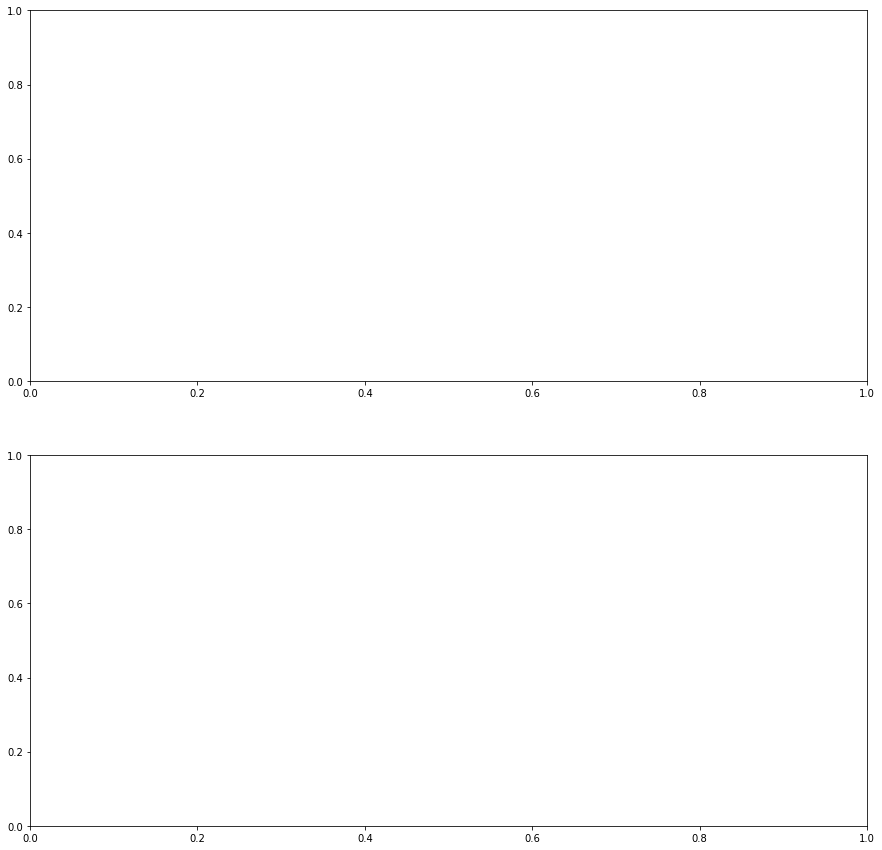

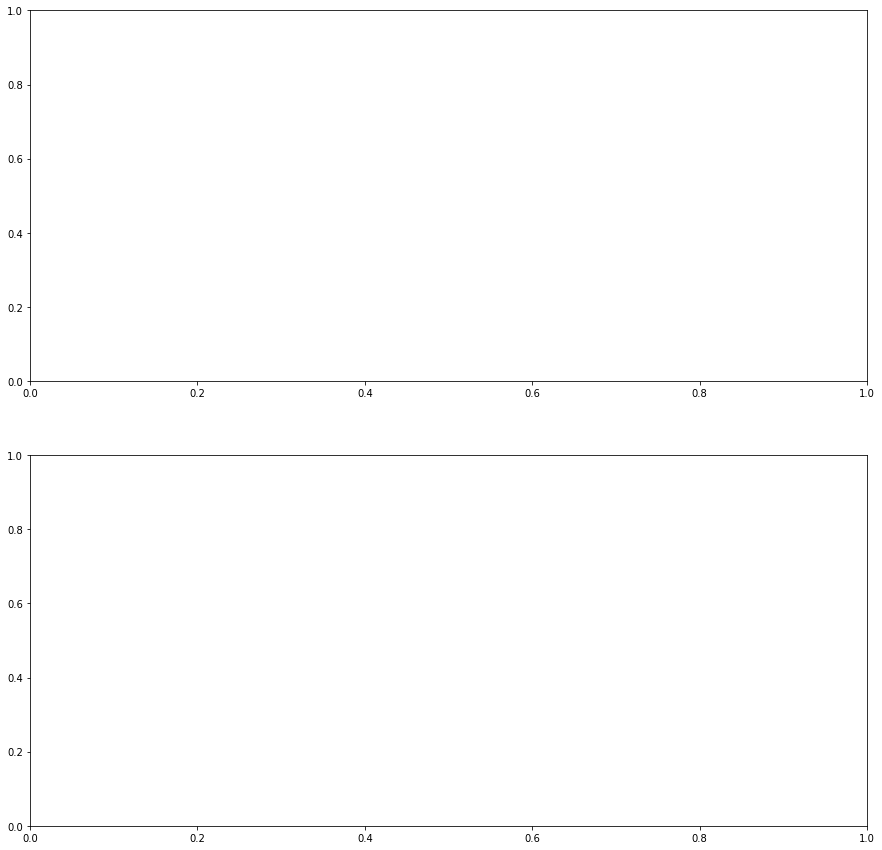

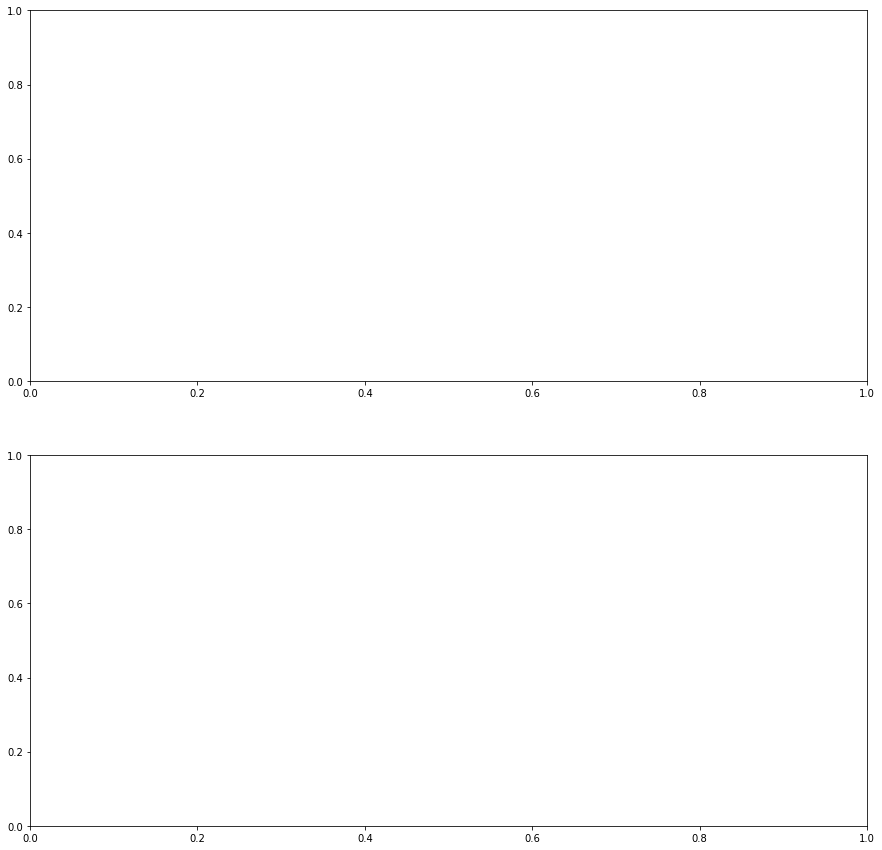

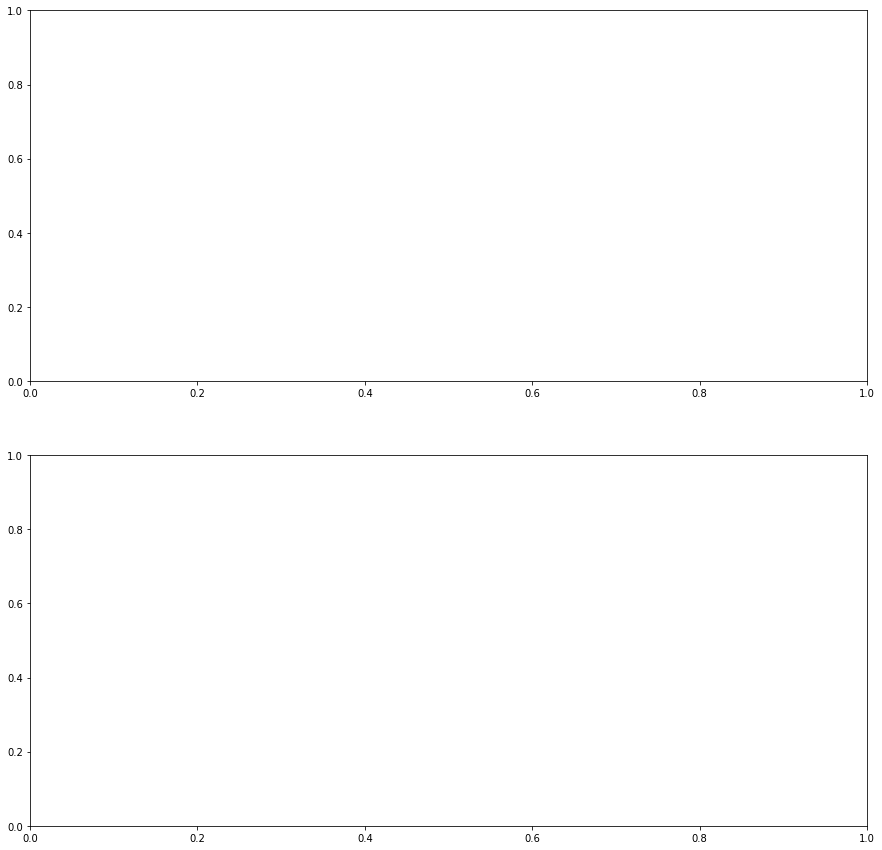

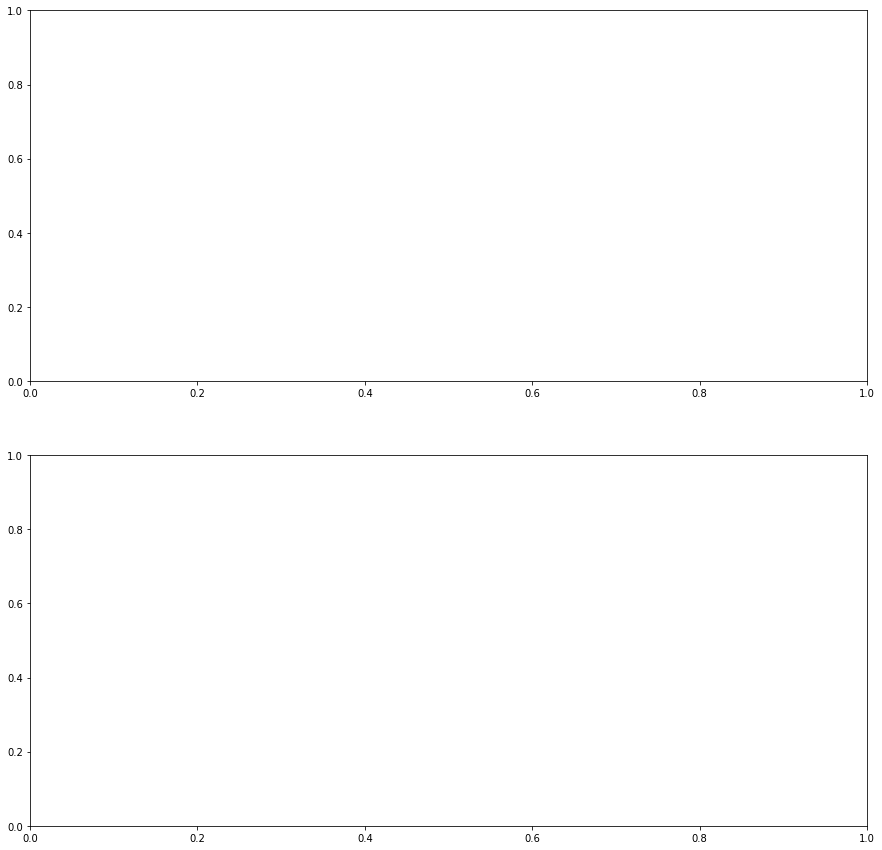

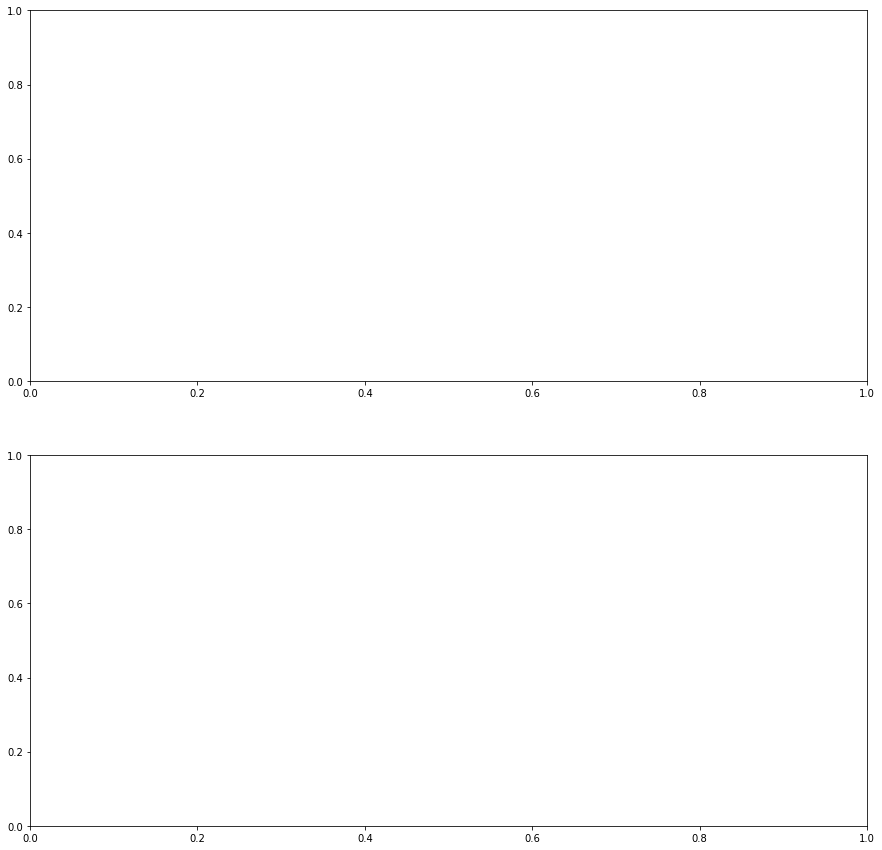

In [ ]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import os

np.seterr(divide='ignore', invalid='ignore')
plt.rcParams.update({'figure.max_open_warning': 0})

def check_agn_remove_process():
    ###############################################################################################
    dir_sf_1re = '/Users/astro/Documents/notebooks/zs/pair-m-z/plateifu_sf.fits'
    dir_stack = '/Users/astro/Documents/notebooks/zs/pair-m-z/stacking/'
    dir_drp='/Users/astro/Documents/notebooks/manga/spectro/analysis/MPL-8/drpall-v2_5_3.fits'
    dir_dap = '/Users/astro/Documents/notebooks/manga/spectro/analysis/MPL-8/HYB10-MILESHC-MILESHC/'
    dir_res='/Users/astro/Documents/notebooks/zs/pair-m-z/check_agn_remove/'
    dir_z925='/Users/astro/Documents/notebooks/zs/pair-m-z/z_9_25.txt'
    dir_ch_z925='/Users/astro/Documents/notebooks/zs/pair-m-z/check_agn_remove/z_925'
    ###############################################################################################
    
    t=Table.read(dir_z925,format='ascii')
    plateifu_z925=t['plateifu']
#     plateifu_sf = f_sf[1].data.field('plateifu')
#     f_drp=fits.open(dir_drp)
#     plateifu=f_drp[1].data.field('plateifu')
#     plateifu_linear=np.setdiff1d(plateifu,plateifu_sf)
    for i in plateifu_z925:
        plt.figure(figsize=(15, 15))
        ax1 = plt.subplot(211)
        ax2=plt.subplot(212)
        if os.path.exists(dir_stack+i+'_1re_stack.fits'):
            if os.path.exists(dir_res+i+'_bpt.jpg'):
                continue
            else:
                f1=fits.open(dir_stack+i+'_1re_stack.fits')
                t = f1[1].data
                wave = t['wave']
                flux = t['flux']
                ax1.plot(wave, flux, label='stacking spectral')
                ax1.legend()

                plate = i.split('-')[0]
                ifu = i.split('-')[1]

                mapf=fits.open(dir_dap+plate+'/'+ifu+'/manga-'+i+'-MAPS-HYB10-MILESHC-MILESHC.fits.gz') 
                flux_map = mapf['EMLINE_GFLUX'].data
                mask_map = mapf['EMLINE_GFLUX_MASK'].data
                ellcoo = mapf['SPX_ELLCOO'].data[1]

                mask=(mask_map!=0)
                flux_map=np.ma.array(flux_map,mask=mask)

                nii=flux_map[19]+flux_map[17]
                ha=flux_map[18]
                oiii=flux_map[13]+flux_map[12]
                hb=flux_map[11]
                x=np.log10(nii/ha)
                y=np.log10(oiii/hb)
                mask_sf=(y<(0.61/(x-0.05)+1.3))
                x_sf=x[mask_sf]
                y_sf=y[mask_sf]
                ax2.scatter(x,y,color='dodgerblue',s=2)
                ax2.scatter(x_sf,y_sf,color='orange',s=2)

                # bpt line
                x_bpt=np.arange(-1.2,0.2,0.02)
                y_bpt=0.61/(x_bpt-0.47)+1.19
                x_bpt1=np.arange(-1.1,-0.2,0.02)
                y_bpt1=0.61/(x_bpt1-0.05)+1.3


                ax2.plot(x_bpt,y_bpt,'r')
                ax2.plot(x_bpt1,y_bpt1,'k:')

                plt.savefig(dir_res+i+'_bpt.jpg')
                plt.clf()
                mapf.close()
                f1.close()

if __name__ == '__main__':
    check_agn_remove_process()